# Assignment 2 (2018201095)


## Problem 2

### 2.1 Gradient descent with constant step size

In [25]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [26]:
def Rosenbrock(x,y):
    return x**2 + 100*(y - x**2)**2

def Grad_Rosenbrock(x,y):
    g1 = 2*x-400*x*y + 400*x**3
    g2 = 200*y -200*x**2
    return np.array([g1,g2])

In [27]:
def Gradient_Descent(Grad,x,y, alpha = 0.00125, epsilon=0.00001, nMax = 1000000 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - alpha * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count


In [7]:
root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock,-2,2)

[3.98677115e-03 1.62182830e-05]


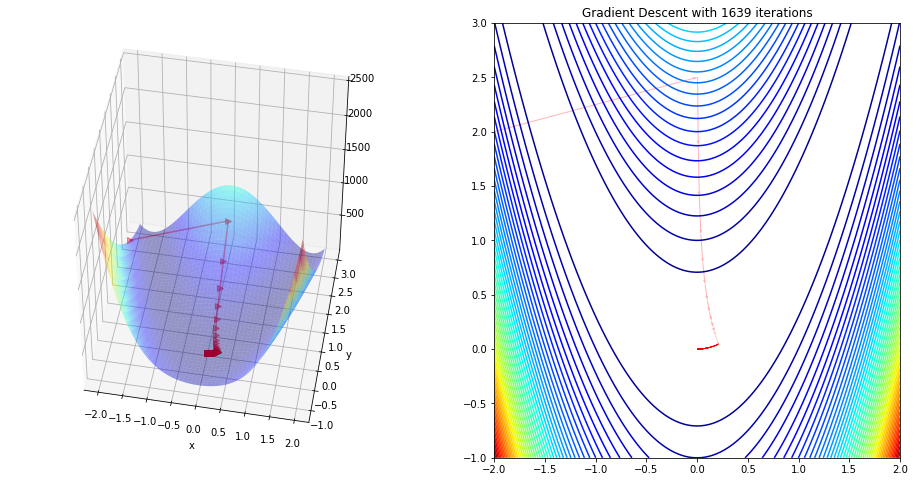

In [8]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, Rosenbrock(iter_x,iter_y),color = 'r', marker = '>', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x,iter_y,color = 'r', marker = '')
ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()


### 2.2 gradient descent with Polyak’s momentum method

In [9]:
def gd_momentum(Grad,x, y, alpha=0.000199, beta=0.9, max_iter=2000, epsilon=1e-9):
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    prev_update=0
    X = np.array([x,y])
    
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        prev_X = X
        update= alpha * Grad(x,y) + beta * prev_update
        prev_update=update
        X = X -update
        error = X - prev_X
        x,y = X[0],X[1]
    print(X)
    return X, iter_x,iter_y, iter_count

In [10]:
root1,iter_x1,iter_y1, iter_count1 = gd_momentum(Grad_Rosenbrock,2,2)

[1.85215488e-04 3.49756354e-08]


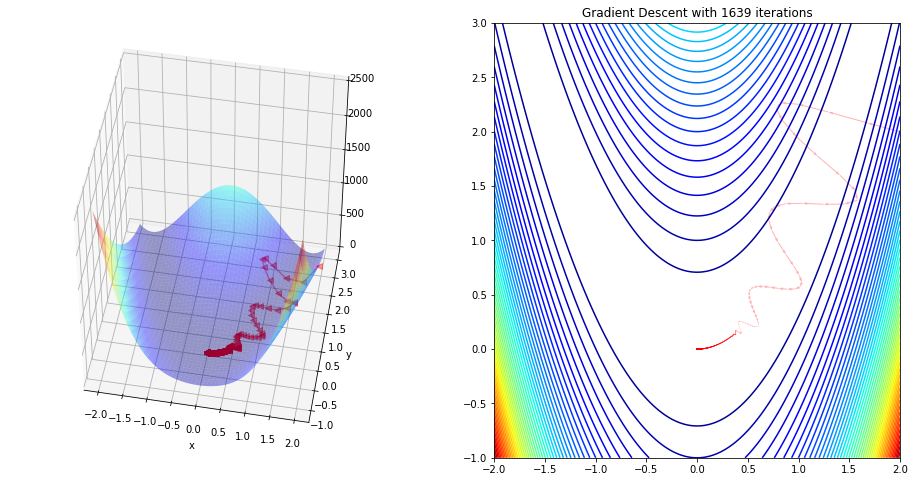

In [11]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx1 = iter_x1[1:] - iter_x1[:-1]
anglesy1= iter_y1[1:] - iter_y1[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x1,iter_y1, Rosenbrock(iter_x1,iter_y1),color = 'r', marker = '<', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x1,iter_y1,color = 'r', marker = '')
ax.quiver(iter_x1[:-1], iter_y1[:-1], anglesx1, anglesy1, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()



### 2.3 gradient descent with using Nesterov accelerated method

In [12]:
def gd_nesterov(Grad,x, y, alpha=0.000389, beta=0.9, max_iter=1000, epsilon=1e-8):
    i = 0
    error = 10
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    prev_update=0
    
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        X_lookahead=X-beta*prev_update
        update=(beta*prev_update)+(alpha*X_lookahead)
        prev_update=update
        X_prev=X
        X = X - update
        error=X-X_prev
        x,y = X[0],X[1]
    print(X)
    return X, iter_x,iter_y, iter_count

In [13]:
root1,iter_x1,iter_y1, iter_count1 = gd_nesterov(Grad_Rosenbrock,2,2)

[0.03693634 0.03693634]


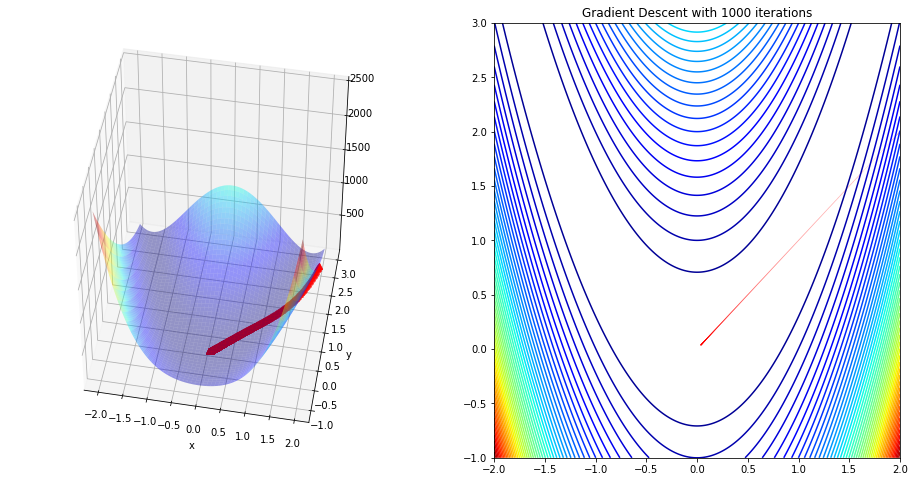

In [14]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx1 = iter_x1[1:] - iter_x1[:-1]
anglesy1= iter_y1[1:] - iter_y1[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x1,iter_y1, Rosenbrock(iter_x1,iter_y1),color = 'r', marker = '^', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x1,iter_y1,color = 'r', marker = '')
ax.quiver(iter_x1[:-1], iter_y1[:-1], anglesx1, anglesy1, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count1)))


plt.show()



### 2.4 Minimize f(x,y) using Adam optimizer

In [15]:
import numpy as np
def gd_adam(Grad, x, y, alpha=0.05, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=2000):
    
    i = 0
    error = 10
    
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])  
    m = 0
    v = 0
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        m = beta1*m + (1-beta1)*Grad(x,y)
        v = beta2*v + (1-beta2)*Grad(x,y)**2
        mc = m/(1+beta1**(i+1))
        vc = v/(1+beta2**(i+1))
        prev_X=X
        X = X - alpha * m / (epsilon + np.sqrt(vc))
        x,y = X[0],X[1]
        error = X - prev_X
    print(X)
    return X, iter_x, iter_y, iter_count

In [16]:
root2,iter_x2,iter_y2, iter_count2 = gd_adam(Grad_Rosenbrock,2,2)

[0.01717444 0.00029688]


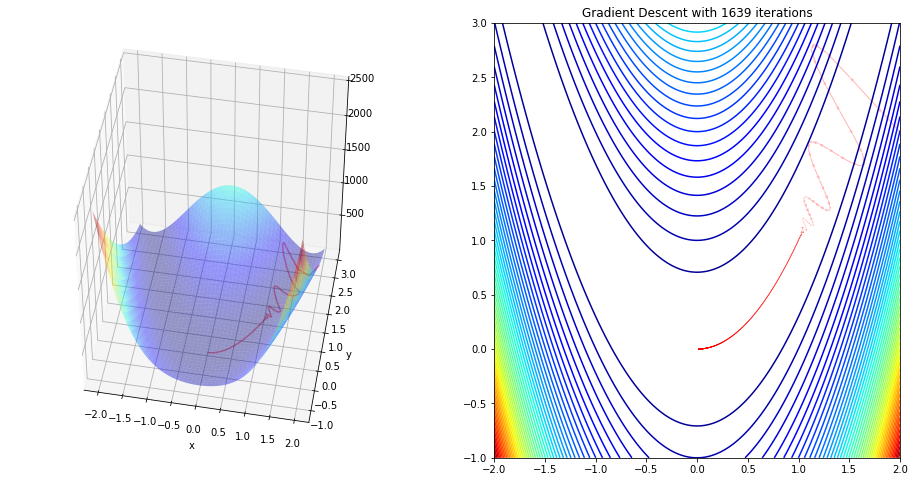

In [17]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = Rosenbrock(X, Y)

#Angles needed for quiver plot
anglesx2 = iter_x2[1:] - iter_x2[:-1]
anglesy2= iter_y2[1:] - iter_y2[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x2,iter_y2, Rosenbrock(iter_x2,iter_y2),color = 'r', marker = '', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x2,iter_y2,color = 'r', marker = '')
ax.quiver(iter_x2[:-1], iter_y2[:-1], anglesx2, anglesy2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()



## Probelm 3

### 3.1 Apply gradient descent

In [608]:
def fun1(x,y):
    return (50/9)*(x**2+y**2)**3-(209/18)*(x**2+y**2)**2+(59/9)*(x**2+y**2)

def Grad_fun1(x,y):
    g1 = (50/3)*((x**2+y**2)**2)*(2*x)-(209/9)*(x**2+y**2)*(2*x)+(59/9)*(2*x)
    g2 = (50/3)*((x**2+y**2)**2)*(2*y)-(209/9)*(x**2+y**2)*(2*y)+(59/9)*(2*y)
    return np.array([g1,g2])

In [609]:
def Gradient_Descent(Grad,x,y, alpha =0.000299, epsilon=1e-9, nMax = 20000 ):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        #print(X) 
        
        X_prev = X
        X = X - alpha * Grad(x,y)
        error = X - X_prev
        x,y = X[0], X[1]
          
    print(X)
    return X, iter_x,iter_y, iter_count


In [610]:
root2,iter_x2,iter_y2, iter_count2 = Gradient_Descent(Grad_fun1,2,2)

[0.70710684 0.70710684]


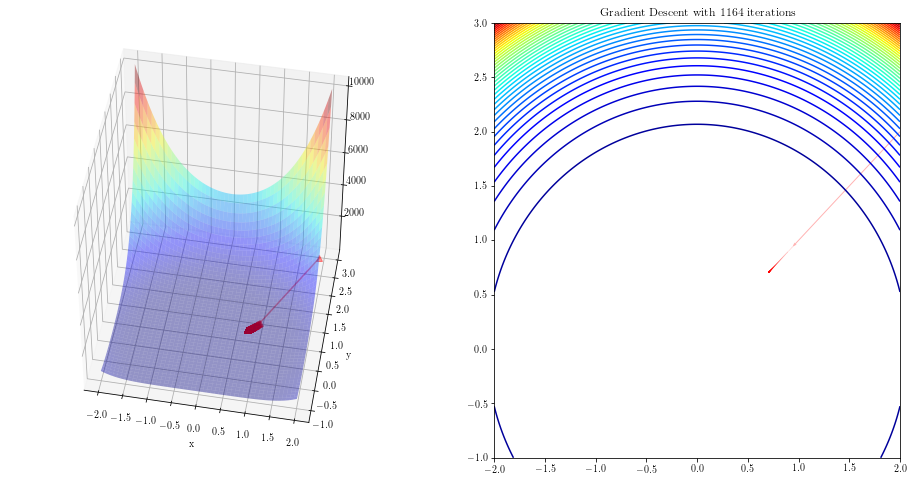

In [613]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = fun1(X, Y)

#Angles needed for quiver plot
anglesx2 = iter_x2[1:] - iter_x2[:-1]
anglesy2= iter_y2[1:] - iter_y2[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x2,iter_y2, fun1(iter_x2,iter_y2),color = 'r', marker = '^', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x2,iter_y2,color = 'r', marker = '')
ax.quiver(iter_x2[:-1], iter_y2[:-1], anglesx2, anglesy2, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count2)))


plt.show()



### 3.2 UsePolyak's momentum method for gradient descent.

In [614]:
def gd_momentum(Grad,x, y, alpha=0.0001, beta=0.9, max_iter=30, epsilon=0.000001):
    i = 0
    error = 10
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    prev_update=0
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        X_prev = X
        update= alpha * Grad(x,y) + beta * prev_update
        prev_update=update
        X = X - update
        error=X-X_prev
        x,y = X[0],X[1]
    print(X)
    return X, iter_x,iter_y, iter_count

In [615]:
root4,iter_x4,iter_y4, iter_count4= gd_momentum(Grad_fun1,2,2)

[-0.1150537 -0.1150537]


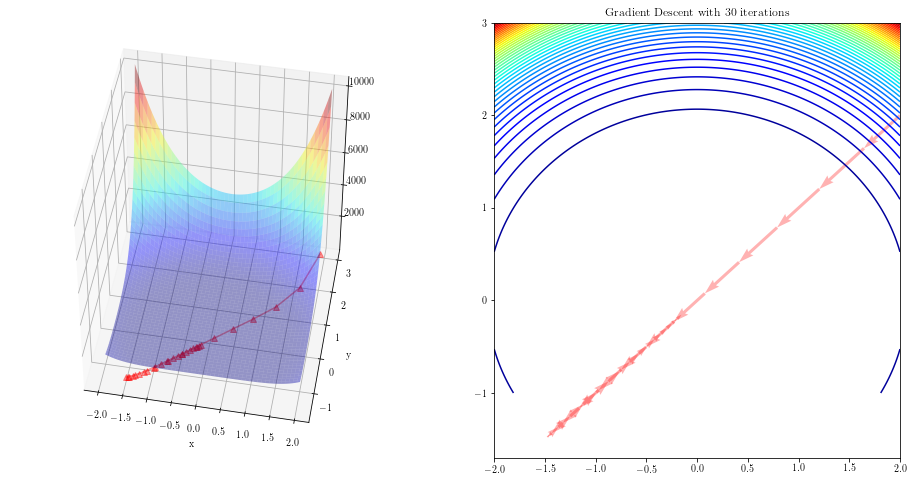

In [616]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = fun1(X, Y)

#Angles needed for quiver plot
anglesx4 = iter_x4[1:] - iter_x4[:-1]
anglesy4= iter_y4[1:] - iter_y4[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x4,iter_y4, fun1(iter_x4,iter_y4),color = 'r', marker = '^', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x4,iter_y4,color = 'r', marker = '')
ax.quiver(iter_x4[:-1], iter_y4[:-1], anglesx4, anglesy4, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count4)))


plt.show()



### 3.3 Use Nesterov's method for gradient descent

In [625]:
def gd_nesterov(Grad,x, y, alpha=0.000589, beta=0.9, max_iter=1000, epsilon=1e-8):
    i = 0
    error = 10
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])
    prev_update=0
    
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        X_lookahead=X-(beta*prev_update)
        update=(beta*prev_update)+(alpha*X_lookahead)
        prev_update=update
        X_prev=X
        X = X - update
        error=X-X_prev
        x,y = X[0],X[1]
    print(X)
    return X, iter_x,iter_y, iter_count

In [626]:
root3,iter_x3,iter_y3, iter_count3 = gd_nesterov(Grad_fun1,2,2)

[0.00420934 0.00420934]


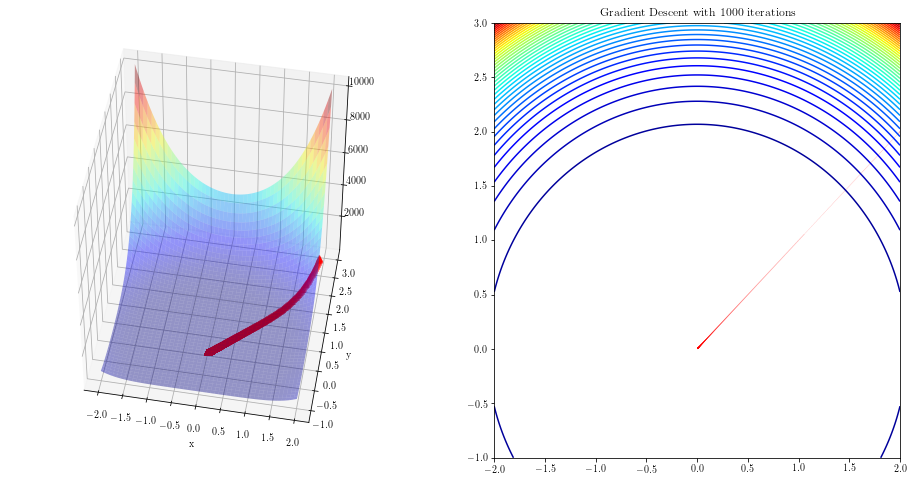

In [627]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = fun1(X, Y)

#Angles needed for quiver plot
anglesx3 = iter_x3[1:] - iter_x3[:-1]
anglesy3= iter_y3[1:] - iter_y3[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x3,iter_y3, fun1(iter_x3,iter_y3),color = 'r', marker = '^', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x3,iter_y3,color = 'r', marker = '')
ax.quiver(iter_x3[:-1], iter_y3[:-1], anglesx3, anglesy3, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count3)))


plt.show()



### 3.4 minimize f(x,y) using Adam Optimizer

In [638]:
def gd_adam(Grad, x, y, alpha=0.01, beta1=0.9, beta2=0.95, epsilon=1e-8, max_iter=20000):
    
    i = 0
    error = 10
    
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    X = np.array([x,y])  
    m = 0
    v = 0
    while np.linalg.norm(error) > epsilon and i < max_iter:
        
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)  
        
        m = beta1*m + (1-beta1)*Grad(x,y)
        v = beta2*v + (1-beta2)*Grad(x,y)**2
        mc = m/(1+beta1**(i+1))
        vc = v/(1+beta2**(i+1))
        X = X - alpha * m / (epsilon + np.sqrt(vc))
        x,y = X[0],X[1]
    print(X)
    return X, iter_x, iter_y, iter_count

In [639]:
root3,iter_x3,iter_y3, iter_count3 = gd2_adam(Grad_fun1,2,2)

[-0.70710662 -0.70710662]


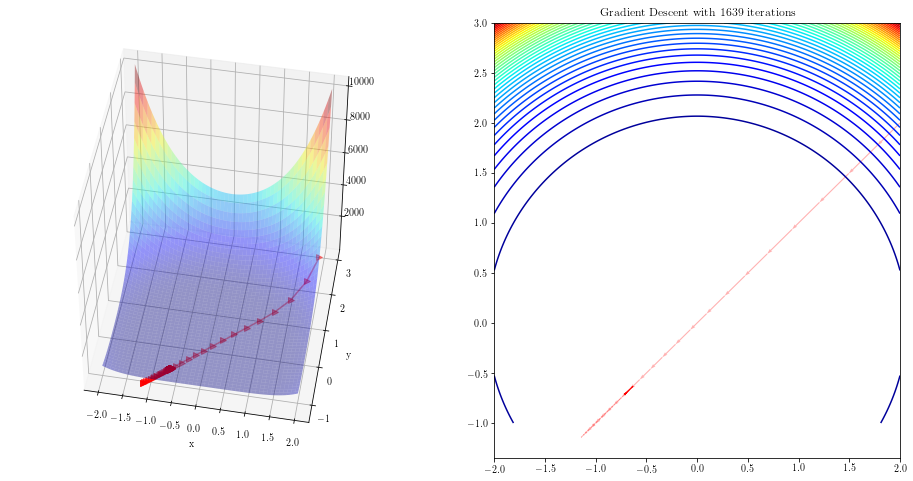

In [640]:
x = np.linspace(-2,2,250)
y = np.linspace(-1,3,250)
X, Y = np.meshgrid(x, y)
Z = fun1(X, Y)

#Angles needed for quiver plot
anglesx3 = iter_x3[1:] - iter_x3[:-1]
anglesy3= iter_y3[1:] - iter_y3[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x3,iter_y3, fun1(iter_x3,iter_y3),color = 'r', marker = '>', alpha = .4)

ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')


#Contour plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(X,Y,Z, 50, cmap = 'jet')
#Plotting the iterations and intermediate values
ax.scatter(iter_x3,iter_y3,color = 'r', marker = '')
ax.quiver(iter_x3[:-1], iter_y3[:-1], anglesx3, anglesy3, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


plt.show()



## Problem 5

The concrete compressive strength is the regression problem. There are a
total of 1030 examples with 8 variables. Randomly split the data in training set
(70% of total points) and testing set (30% of total points)

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [187]:
df = pd.read_excel('Concrete_Data.xls')
display(df.describe())

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [202]:
dfNorm = df/df.mean()
dfNorm.X = dfNorm.iloc[:,0:8]
dfNorm.y = dfNorm.iloc[:,8]

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
X=dfNorm.X.values
y=dfNorm.y.values

In [204]:
y

array([2.23313634, 1.72783655, 1.12428723, ..., 0.66158661, 0.91485249,
       0.90461175])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Using backpropagation with 25 units in hidden layers

In [206]:
from sklearn.neural_network import MLPRegressor
nn= MLPRegressor(solver='adam', hidden_layer_sizes=25,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.00008)

In [207]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

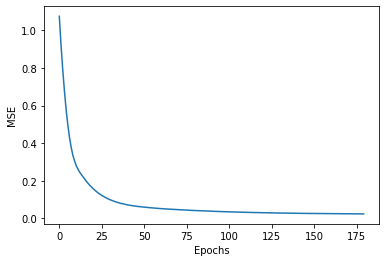

In [208]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn.loss_curve_)
plt.show()

In [209]:
y_train_true=nn.predict(X_train)

#### Train error

In [210]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_true)

0.04643248847817494

#### Test Error

In [211]:
y_test_true=nn.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.058014846774573844

#### Using backpropagation with 50 units in hidden layers

In [212]:
from sklearn.neural_network import MLPRegressor
nn1= MLPRegressor(solver='adam', hidden_layer_sizes=50,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.00008)

In [213]:
nn1.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

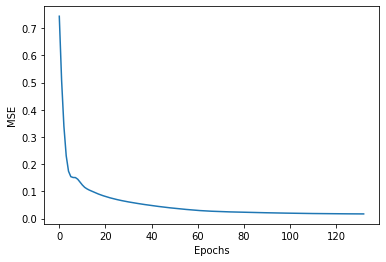

In [214]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn1.loss_curve_)
plt.show()

In [215]:
y_train_true=nn1.predict(X_train)

#### Train Error

In [216]:
mean_squared_error(y_train, y_train_true)

0.033932053713961116

#### Test Error

In [217]:
y_test_true=nn1.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.04029983596965353

#### Using backpropagation with 75 units in hidden layers

In [218]:
nn2= MLPRegressor(solver='adam', hidden_layer_sizes=75,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='relu',learning_rate='constant',alpha=0.00008)

In [219]:
nn2.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=75, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

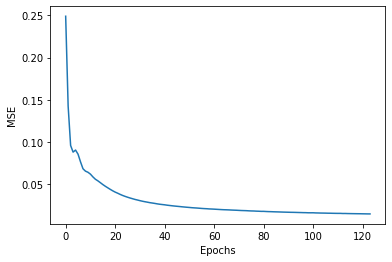

In [220]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn2.loss_curve_)
plt.show()

#### Train Error

In [221]:
y_train_true=nn2.predict(X_train)
mean_squared_error(y_train,y_train_true)

0.02952647220201347

#### Test Error

In [222]:
y_test_true=nn2.predict(X_test)
mean_squared_error(y_test,y_test_true)

0.03882968624375911

#### Backpropapagation with single layer 25 units and tanh activation function

In [223]:
nn4= MLPRegressor(solver='adam', hidden_layer_sizes=25,
                           max_iter=1000, shuffle=True, random_state=1,
                           activation='tanh',learning_rate='constant',alpha=0.00008)

In [224]:
nn4.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=25, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

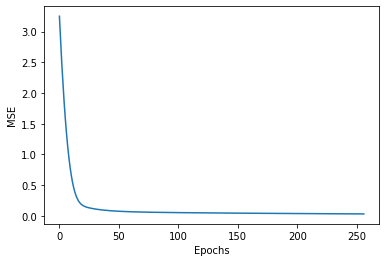

In [225]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn4.loss_curve_)
plt.show()


In [226]:
y_train_true=nn4.predict(X_train)

#### Train error

In [227]:
mean_squared_error(y_train, y_train_true)

0.061775786291950525

#### Test Error

In [228]:
y_test_true=nn4.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.06978730713246797

#### backprop with 50 units in single layer tanh

In [229]:
nn5= MLPRegressor(solver='adam', hidden_layer_sizes=50,
                   max_iter=1000, shuffle=True, random_state=1,
                   activation='tanh',learning_rate='constant',alpha=0.00008)

In [230]:
nn5.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

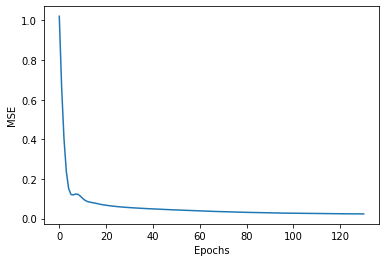

In [231]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn5.loss_curve_)
plt.show()

In [232]:
y_train_true=nn5.predict(X_train)

#### Train Error

In [233]:
mean_squared_error(y_train, y_train_true)

0.04720931772311779

#### Test Error

In [234]:
y_test_true=nn5.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.053519704566449326

#### backprop with 75 units in single layer tanh

In [235]:
nn6= MLPRegressor(solver='adam', hidden_layer_sizes=50,
		                   max_iter=1000, shuffle=True, random_state=1,
		                   activation='tanh',learning_rate='constant',alpha=0.00008)

In [236]:
nn6.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=8e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

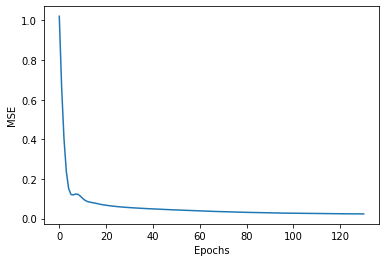

In [237]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(nn6.loss_curve_)
plt.show()


In [238]:
y_train_true=nn6.predict(X_train)

#### Train Error

In [239]:
y_train_true=nn6.predict(X_train)

In [240]:
mean_squared_error(y_train, y_train_true)

0.04720931772311779

#### Test Error

In [241]:
y_test_true=nn6.predict(X_test)
mean_squared_error(y_test, y_test_true)

0.053519704566449326

### Nueral net using Rprop

#### Using 25 units in hidden layer

#### Using 50 units in single hidden layer

#### Using 75 units in single hidden layer

In [20]:
def ReLU_function( signal, derivative=False ):
    if derivative:
        return (signal > 0).astype(float)
    else:
        return np.maximum( 0, signal )
    
def tanh_function( signal, derivative=False ):
    signal = np.tanh( signal )
    
    if derivative:
        return 1-np.power(signal,2)
    else:
        return signal
    
def sum_squared_error( outputs, targets, derivative=False ):
    if derivative:
        return outputs - targets 
    else:
        return 0.5 * np.mean(np.sum( np.power(outputs - targets,2), axis = 1 ))
    
    
def add_bias(A):
    return np.hstack(( np.ones((A.shape[0],1)), A ))
#end addBias


In [22]:
import numpy as np

default_settings = {
    # Optional settings
    "weights_low"           : -0.1,     # Lower bound on initial weight range
    "weights_high"          : 0.1,      # Upper bound on initial weight range
    "initial_bias_value"    : 0.01,
}

class NeuralNet:
    def __init__(self, settings ):
        self.__dict__.update( default_settings )
        self.__dict__.update( settings )
        self.n_weights = (self.n_inputs + 1) * self.layers[0][0] + sum( (self.layers[i][0] + 1) * layer[0] for i, layer in enumerate( self.layers[1:] ) )
        self.set_weights( self.generate_weights( self.weights_low, self.weights_high ) )
        for index in range(len(self.layers)):
            self.weights[index][:1,:] = self.initial_bias_value    
    
    def generate_weights(self, low = -0.1, high = 0.1):
        return np.random.uniform(low, high, size=(self.n_weights,))
    
    def set_weights(self, weight_list ):
        start, stop         = 0, 0
        self.weights        = [ ]
        previous_shape      = self.n_inputs + 1
        
        for n_neurons, activation_function in self.layers:
            stop           += previous_shape * n_neurons
            self.weights.append( weight_list[ start:stop ].reshape( previous_shape, n_neurons ))
            
            previous_shape  = n_neurons + 1
            start           = stop
    
    def get_weights(self, ):
        return [w for l in self.weights for w in l.flat]    
    
    def error(self, weight_vector, training_data, training_targets, cost_function ):
        self.set_weights( np.array(weight_vector) )
        out = self.update( training_data )
        return cost_function(out, training_targets )
    
    def measure_quality(self, training_data, training_targets, cost_function ):
        out = self.update( training_data )
        mean_error = cost_function( out, training_targets ) / float(training_data.shape[0])
        range_of_predicted_values = np.max(out) - np.min(out)
        return 1 - (mean_error / range_of_predicted_values)
    
    
    def gradient(self, weight_vector, training_data, training_targets, cost_function ):
        # assign the weight_vector as the network topology
        self.set_weights( np.array(weight_vector) )
        
        input_signals, derivatives  = self.update( training_data, trace=True )                  
        out                         = input_signals[-1]
        cost_derivative             = cost_function(out, training_targets, derivative=True).T
        delta                       = cost_derivative * derivatives[-1]
        
        layer_indexes               = range( len(self.layers) )[::-1]    # reversed
        n_samples                   = float(training_data.shape[0])
        deltas_by_layer             = []
        
        for i in layer_indexes:
            # Loop over the weight layers in reversed order to calculate the deltas
            deltas_by_layer.append(list((np.dot( delta, add_bias(input_signals[i]) )/n_samples).T.flat))
            
            if i!= 0:
                # i!= 0 because we don't want calculate the delta unnecessarily.
                weight_delta        = np.dot( self.weights[ i ][1:,:], delta ) # Skip the bias weight
    
                # Calculate the delta for the subsequent layer
                delta               = weight_delta * derivatives[i-1]
        #end weight adjustment loop
        
        return np.hstack( reversed(deltas_by_layer) )
    # end gradient
    
    
    def check_gradient(self, trainingset, cost_function, epsilon = 1e-4 ):
        check_network_structure( self, cost_function ) # check for special case topology requirements, such as softmax
    
        training_data, training_targets = verify_dataset_shape_and_modify( self, trainingset )
        
        # assign the weight_vector as the network topology
        initial_weights         = np.array(self.get_weights())
        numeric_gradient        = np.zeros( initial_weights.shape )
        perturbed               = np.zeros( initial_weights.shape )
        n_samples               = float(training_data.shape[0])
        
        print ("[gradient check] Running gradient check...")
        
        for i in range( self.n_weights ):
            perturbed[i]        = epsilon
            right_side          = self.error( initial_weights + perturbed, training_data, training_targets, cost_function )
            left_side           = self.error( initial_weights - perturbed, training_data, training_targets, cost_function )
            numeric_gradient[i] = (right_side - left_side) / (2 * epsilon)
            perturbed[i]        = 0
        
        # Reset the weights
        self.set_weights( initial_weights )  
        # Calculate the analytic gradient
        analytic_gradient       = self.gradient( self.get_weights(), training_data, training_targets, cost_function )
        
        # Compare the numeric and the analytic gradient
        ratio  = np.linalg.norm(analytic_gradient - numeric_gradient) / np.linalg.norm(analytic_gradient + numeric_gradient)
        return ratio
    #end
    
    
    def update(self, input_values, trace=False ):
        # This is a forward operation in the network. This is how we 
        # calculate the network output from a set of input signals.
        output          = input_values
        
        if trace: 
            derivatives = [ ]        # collection of the derivatives of the act functions
            outputs     = [ output ] # passed through act. func.
        
        for i, weight_layer in enumerate(self.weights):
            # Loop over the network layers and calculate the output
            signal      = np.dot( output, weight_layer[1:,:] ) + weight_layer[0:1,:] # implicit bias
            output      = self.layers[i][1]( signal )
            
            if trace: 
                outputs.append( output )
                derivatives.append( self.layers[i][1]( signal, derivative = True ).T ) # the derivative used for weight update

        if trace: 
            return outputs, derivatives
        return output
    
    def predict(self, predict_set ):
        return self.update( predict_set )

In [23]:
import numpy as np


def resilient_backpropagation(network, trainingset, training_labels, testset, test_labels, cost_function, ERROR_LIMIT=1e-3, max_iterations = (1000), weight_step_max = 50., weight_step_min = 0., start_step = 0.5, learn_max = 1.2, learn_min = 0.5, print_rate = 1, save_trained_network = True ):  
    
    epo=np.array([])
    err=np.array([])
    ind=0
    print(trainingset.shape,training_labels.shape,testset.shape,test_labels.shape)
    print(training_labels.shape[0],network.layers[-1][0])
    training_labels=training_labels.reshape((training_labels.shape[0],1))
    test_labels=test_labels.reshape((test_labels.shape[0],1))
    assert trainingset[0].shape[0] == network.n_inputs, "ERROR: input size varies from the defined input setting"
    assert training_labels[0].shape[0] == network.layers[-1][0],"ERROR: output size varies from the defined output setting"
    
    training_data              = trainingset
    training_targets           = training_labels
    test_data                  = testset
    test_targets               = test_labels
    
    # Storing the current / previous weight step size
    weight_step                = [ np.full( weight_layer.shape, start_step ) for weight_layer in network.weights ]
    
    # Storing the current / previous weight update
    dW                         = [  np.ones(shape=weight_layer.shape) for weight_layer in network.weights ]
    
    # Storing the previous derivative
    previous_dEdW              = [ 1 ] * len( network.weights )
    
    # Storing the previous error measurement
    prev_error                 = ( )                             # inf
    
    input_signals, derivatives = network.update( training_data, trace=True )
    out                        = input_signals[-1]
    cost_derivative            = cost_function(out, training_targets, derivative=True).T
    delta                      = cost_derivative * derivatives[-1]
    error                      = cost_function(network.update( test_data ), test_targets )
    
    n_samples                  = float(training_data.shape[0])
    layer_indexes              = range( len(network.layers) )[::-1] # reversed
    epoch                      = 0
    
    while error > ERROR_LIMIT and epoch < max_iterations:
        epoch       += 1
        epo=np.append(epo,epoch)
        
        for i in layer_indexes:
            # Loop over the weight layers in reversed order to calculate the deltas
                   
            # Calculate the delta with respect to the weights
            dEdW = (np.dot( delta, add_bias(input_signals[i]) )/n_samples).T
            
            if i != 0:
                """Do not calculate the delta unnecessarily."""
                # Skip the bias weight
                weight_delta = np.dot( network.weights[ i ][1:,:], delta )
    
                # Calculate the delta for the subsequent layer
                delta = weight_delta * derivatives[i-1]
            
            
            # Calculate sign changes and note where they have changed
            diffs            = np.multiply( dEdW, previous_dEdW[i] )
            pos_indexes      = np.where( diffs > 0 )
            neg_indexes      = np.where( diffs < 0 )
            zero_indexes     = np.where( diffs == 0 )
            
            
            # positive
            if np.any(pos_indexes):
                # Calculate the weight step size
                weight_step[i][pos_indexes] = np.minimum( weight_step[i][pos_indexes] * learn_max, weight_step_max )
                
                # Calculate the weight step direction
                dW[i][pos_indexes] = np.multiply( -np.sign( dEdW[pos_indexes] ), weight_step[i][pos_indexes] )
                
                # Apply the weight deltas
                network.weights[i][ pos_indexes ] += dW[i][pos_indexes]
            
            # negative
            if np.any(neg_indexes):
                weight_step[i][neg_indexes] = np.maximum( weight_step[i][neg_indexes] * learn_min, weight_step_min )
                
                if error > prev_error:
                    # iRprop+ version of resilient backpropagation
                    network.weights[i][ neg_indexes ] -= dW[i][neg_indexes] # backtrack
                
                dEdW[ neg_indexes ] = 0
            
            # zeros
            if np.any(zero_indexes):
                dW[i][zero_indexes] = np.multiply( -np.sign( dEdW[zero_indexes] ), weight_step[i][zero_indexes] )
                network.weights[i][ zero_indexes ] += dW[i][zero_indexes]
            
            # Store the previous weight step
            previous_dEdW[i] = dEdW
        #end weight adjustment loop
        
        prev_error                 = error
        err=np.append(err,error)
        
        input_signals, derivatives = network.update( training_data, trace=True )
        out                        = input_signals[-1]
        cost_derivative            = cost_function(out, training_targets, derivative=True).T
        delta                      = cost_derivative * derivatives[-1]
        error                      = cost_function(network.update( training_data ), training_targets )
        
        if epoch%print_rate==0:
            # Show the current training status
            print ("[training] Current error:", error, "\tEpoch:", epoch)

    print ("[training] Finished:")
    print ("[training]   Converged to error bound {0} with error {1}." , ( ERROR_LIMIT, error ))
    print ("[training]   Measured quality train data:"  ,network.measure_quality( training_data, training_targets, cost_function ))
    print ("[training]   Measured quality for test data:"  ,network.measure_quality( test_data, test_targets, cost_function ))
    print ("[training]   Trained for {0} epochs.", epoch)
    
    return epo,err
# end backprop

#### Rprop with 25 neurons in hidden layers using ReLU function

In [24]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (25, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

NameError: name 'X_train' is not defined

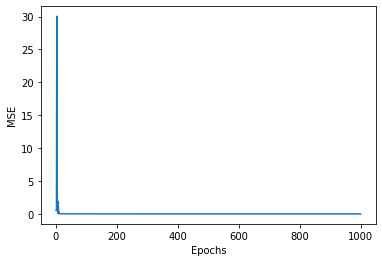

In [337]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(epos,errs)
plt.show()


#### rprop with 50 neurons in hidden layer (ReLU)

In [19]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (50, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

NameError: name 'ReLU_function' is not defined

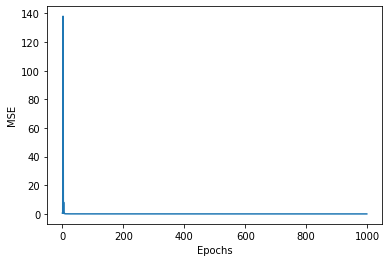

In [311]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 75 neurons in hidden layer (ReLU)

In [18]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (75, ReLU_function), (1, ReLU_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

NameError: name 'ReLU_function' is not defined

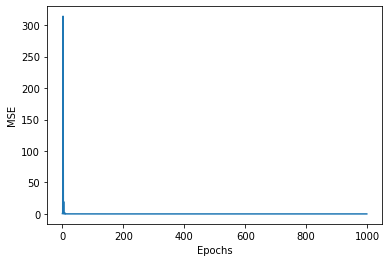

In [313]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 25 neurons in hidden layer using tanh function

In [338]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (25, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.1092548922105903 	Epoch: 1
[training] Current error: 0.10993488498073677 	Epoch: 2
[training] Current error: 0.9200557522087519 	Epoch: 3
[training] Current error: 0.10984006986028173 	Epoch: 4
[training] Current error: 0.18778786593818342 	Epoch: 5
[training] Current error: 0.10993480716833971 	Epoch: 6
[training] Current error: 0.10992649875230981 	Epoch: 7
[training] Current error: 0.1011238242480037 	Epoch: 8
[training] Current error: 0.4046169818617147 	Epoch: 9
[training] Current error: 0.10536892772029666 	Epoch: 10
[training] Current error: 0.10330390523363366 	Epoch: 11
[training] Current error: 0.09716877088706728 	Epoch: 12
[training] Current error: 0.09977342183225847 	Epoch: 13
[training] Current error: 0.09824783130169744 	Epoch: 14
[training] Current error: 0.09451319653249053 	Epoch: 15
[training] Current error: 0.09090221383479116 	Epoch: 16
[training] Current error: 0.08944685412286978 	Epoch: 17
[train

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.08427727226468025 	Epoch: 21
[training] Current error: 0.08337439291376626 	Epoch: 22
[training] Current error: 0.08194917317571149 	Epoch: 23
[training] Current error: 0.0805909501914339 	Epoch: 24
[training] Current error: 0.07954380911969425 	Epoch: 25
[training] Current error: 0.078940030251082 	Epoch: 26
[training] Current error: 0.07836391663175814 	Epoch: 27
[training] Current error: 0.07783675607039776 	Epoch: 28
[training] Current error: 0.07766680117135831 	Epoch: 29
[training] Current error: 0.07741481560113152 	Epoch: 30
[training] Current error: 0.07720015755450785 	Epoch: 31
[training] Current error: 0.07688784614503033 	Epoch: 32
[training] Current error: 0.07654666771705931 	Epoch: 33
[training] Current error: 0.07613617868104651 	Epoch: 34
[training] Current error: 0.07568650552097429 	Epoch: 35
[training] Current error: 0.0753141932096441 	Epoch: 36
[training] Current error: 0.07494917955870307 	Epoch: 37
[training] Current error: 0.0750019

[training] Current error: 0.07006937777570715 	Epoch: 179
[training] Current error: 0.0700566443573494 	Epoch: 180
[training] Current error: 0.07004379105697467 	Epoch: 181
[training] Current error: 0.07003455144866172 	Epoch: 182
[training] Current error: 0.07002235483984416 	Epoch: 183
[training] Current error: 0.07001105988657177 	Epoch: 184
[training] Current error: 0.06999984239664807 	Epoch: 185
[training] Current error: 0.06998856436812537 	Epoch: 186
[training] Current error: 0.0699770936984443 	Epoch: 187
[training] Current error: 0.06996515236543954 	Epoch: 188
[training] Current error: 0.06995342215398331 	Epoch: 189
[training] Current error: 0.06994268728732028 	Epoch: 190
[training] Current error: 0.06992961444267451 	Epoch: 191
[training] Current error: 0.06991693015786735 	Epoch: 192
[training] Current error: 0.06990359755911302 	Epoch: 193
[training] Current error: 0.06990065131437892 	Epoch: 194
[training] Current error: 0.06988905299605817 	Epoch: 195
[training] Curre

[training] Current error: 0.06868009677349124 	Epoch: 328
[training] Current error: 0.06867456628480846 	Epoch: 329
[training] Current error: 0.06866857808441414 	Epoch: 330
[training] Current error: 0.06866208328227771 	Epoch: 331
[training] Current error: 0.06865600407742364 	Epoch: 332
[training] Current error: 0.06865061181364544 	Epoch: 333
[training] Current error: 0.06864639084011805 	Epoch: 334
[training] Current error: 0.06864182904066035 	Epoch: 335
[training] Current error: 0.06863762620366894 	Epoch: 336
[training] Current error: 0.06863293525781679 	Epoch: 337
[training] Current error: 0.06862806914913673 	Epoch: 338
[training] Current error: 0.06862352521603274 	Epoch: 339
[training] Current error: 0.06861820489925076 	Epoch: 340
[training] Current error: 0.06861258364733992 	Epoch: 341
[training] Current error: 0.06860686256150253 	Epoch: 342
[training] Current error: 0.06860102598130446 	Epoch: 343
[training] Current error: 0.06859572818613165 	Epoch: 344
[training] Cur

[training] Current error: 0.06817131713449083 	Epoch: 485
[training] Current error: 0.06816913219866098 	Epoch: 486
[training] Current error: 0.06816684212378778 	Epoch: 487
[training] Current error: 0.06816431661587631 	Epoch: 488
[training] Current error: 0.0681615513353715 	Epoch: 489
[training] Current error: 0.06815855297458918 	Epoch: 490
[training] Current error: 0.06815536156378366 	Epoch: 491
[training] Current error: 0.06815391527752639 	Epoch: 492
[training] Current error: 0.06815139230150626 	Epoch: 493
[training] Current error: 0.06814939268555899 	Epoch: 494
[training] Current error: 0.06814691585049394 	Epoch: 495
[training] Current error: 0.06814408312524688 	Epoch: 496
[training] Current error: 0.06814171831811282 	Epoch: 497
[training] Current error: 0.06813895182996198 	Epoch: 498
[training] Current error: 0.06813615861133733 	Epoch: 499
[training] Current error: 0.06813478214015921 	Epoch: 500
[training] Current error: 0.06813218046091485 	Epoch: 501
[training] Curr

[training] Current error: 0.06785139040400501 	Epoch: 640
[training] Current error: 0.06784877351950597 	Epoch: 641
[training] Current error: 0.06784791502168395 	Epoch: 642
[training] Current error: 0.06784492875931199 	Epoch: 643
[training] Current error: 0.0678427591518808 	Epoch: 644
[training] Current error: 0.067840481036288 	Epoch: 645
[training] Current error: 0.06783805253501737 	Epoch: 646
[training] Current error: 0.06783533128593601 	Epoch: 647
[training] Current error: 0.06783400805632385 	Epoch: 648
[training] Current error: 0.06783132031186509 	Epoch: 649
[training] Current error: 0.06782928457707942 	Epoch: 650
[training] Current error: 0.06782688690159912 	Epoch: 651
[training] Current error: 0.06782422732908794 	Epoch: 652
[training] Current error: 0.06782159413543419 	Epoch: 653
[training] Current error: 0.06781883158095922 	Epoch: 654
[training] Current error: 0.06781573915081034 	Epoch: 655
[training] Current error: 0.06781293256452196 	Epoch: 656
[training] Curren

[training] Current error: 0.06757750965519001 	Epoch: 794
[training] Current error: 0.0675750952966671 	Epoch: 795
[training] Current error: 0.06757289622494023 	Epoch: 796
[training] Current error: 0.06757147370667424 	Epoch: 797
[training] Current error: 0.06756848542713881 	Epoch: 798
[training] Current error: 0.06756621943371413 	Epoch: 799
[training] Current error: 0.06756359556533097 	Epoch: 800
[training] Current error: 0.06756087022133614 	Epoch: 801
[training] Current error: 0.06755773118161343 	Epoch: 802
[training] Current error: 0.0675546751523785 	Epoch: 803
[training] Current error: 0.06755153205789792 	Epoch: 804
[training] Current error: 0.06754976744120349 	Epoch: 805
[training] Current error: 0.06754725762343461 	Epoch: 806
[training] Current error: 0.06754482137606958 	Epoch: 807
[training] Current error: 0.06754243652766663 	Epoch: 808
[training] Current error: 0.06754033245974374 	Epoch: 809
[training] Current error: 0.06753786143252762 	Epoch: 810
[training] Curre

[training] Current error: 0.06733979593910956 	Epoch: 946
[training] Current error: 0.06733841529486664 	Epoch: 947
[training] Current error: 0.06733695871668971 	Epoch: 948
[training] Current error: 0.06733535757900681 	Epoch: 949
[training] Current error: 0.06733379289308905 	Epoch: 950
[training] Current error: 0.06733249692854389 	Epoch: 951
[training] Current error: 0.06733083317959448 	Epoch: 952
[training] Current error: 0.06732919201432437 	Epoch: 953
[training] Current error: 0.06732742931175588 	Epoch: 954
[training] Current error: 0.06732593004273926 	Epoch: 955
[training] Current error: 0.06732378903062274 	Epoch: 956
[training] Current error: 0.0673216900033298 	Epoch: 957
[training] Current error: 0.06731933031862081 	Epoch: 958
[training] Current error: 0.0673165871959748 	Epoch: 959
[training] Current error: 0.06731390212930088 	Epoch: 960
[training] Current error: 0.06731303164000373 	Epoch: 961
[training] Current error: 0.06731046315665343 	Epoch: 962
[training] Curre

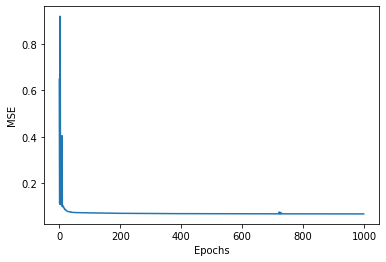

In [339]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 50 neurons in hidden layer using tanh function

In [340]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (50, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.10993488496845906 	Epoch: 1
[training] Current error: 0.12136426185735044 	Epoch: 2
[training] Current error: 0.1099348849810147 	Epoch: 3
[training] Current error: 0.44423435523349003 	Epoch: 4
[training] Current error: 0.10993488498101432 	Epoch: 5
[training] Current error: 0.10993483599020604 	Epoch: 6
[training] Current error: 0.5494582651616228 	Epoch: 7
[training] Current error: 0.10993478889861968 	Epoch: 8
[training] Current error: 0.10030718705783055 	Epoch: 9


/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.10045573406462542 	Epoch: 10
[training] Current error: 0.46242444234725055 	Epoch: 11
[training] Current error: 0.09974995037637828 	Epoch: 12
[training] Current error: 0.1085693524918279 	Epoch: 13
[training] Current error: 0.10050835772230388 	Epoch: 14
[training] Current error: 0.8528143190235713 	Epoch: 15
[training] Current error: 0.10696142589534363 	Epoch: 16
[training] Current error: 0.09983111410624186 	Epoch: 17
[training] Current error: 0.9707632055542714 	Epoch: 18
[training] Current error: 0.09850540669012947 	Epoch: 19
[training] Current error: 0.31089015686503974 	Epoch: 20
[training] Current error: 0.10138441322254087 	Epoch: 21
[training] Current error: 0.09451390311196904 	Epoch: 22
[training] Current error: 0.20504742185771088 	Epoch: 23
[training] Current error: 0.09374774717323138 	Epoch: 24
[training] Current error: 0.09821999907894839 	Epoch: 25
[training] Current error: 0.09357734138413265 	Epoch: 26
[training] Current error: 0.091646

[training] Current error: 0.06883232364041002 	Epoch: 162
[training] Current error: 0.06880298367757462 	Epoch: 163
[training] Current error: 0.06878504620747666 	Epoch: 164
[training] Current error: 0.06876888470863844 	Epoch: 165
[training] Current error: 0.06873942607764356 	Epoch: 166
[training] Current error: 0.06871016590911996 	Epoch: 167
[training] Current error: 0.06869020557165954 	Epoch: 168
[training] Current error: 0.068669959452991 	Epoch: 169
[training] Current error: 0.06864802776472174 	Epoch: 170
[training] Current error: 0.06862770829350857 	Epoch: 171
[training] Current error: 0.06860322881054197 	Epoch: 172
[training] Current error: 0.06857923209613473 	Epoch: 173
[training] Current error: 0.0685520019823135 	Epoch: 174
[training] Current error: 0.06852118967207482 	Epoch: 175
[training] Current error: 0.06848869571552223 	Epoch: 176
[training] Current error: 0.06845437232650028 	Epoch: 177
[training] Current error: 0.06841965304454876 	Epoch: 178
[training] Curren

[training] Current error: 0.06764394534021488 	Epoch: 304
[training] Current error: 0.06764099163272284 	Epoch: 305
[training] Current error: 0.06763828100429943 	Epoch: 306
[training] Current error: 0.0676356198517724 	Epoch: 307
[training] Current error: 0.06763248352672366 	Epoch: 308
[training] Current error: 0.06762916238445166 	Epoch: 309
[training] Current error: 0.06762568521340534 	Epoch: 310
[training] Current error: 0.06762167268516388 	Epoch: 311
[training] Current error: 0.06761741892034663 	Epoch: 312
[training] Current error: 0.06761346608299207 	Epoch: 313
[training] Current error: 0.067609063981124 	Epoch: 314
[training] Current error: 0.06760436785750949 	Epoch: 315
[training] Current error: 0.0675993421985387 	Epoch: 316
[training] Current error: 0.0675947996573285 	Epoch: 317
[training] Current error: 0.06758998263184471 	Epoch: 318
[training] Current error: 0.06762808018923785 	Epoch: 319
[training] Current error: 0.06764222919322833 	Epoch: 320
[training] Current 

[training] Current error: 0.0672602330792544 	Epoch: 448
[training] Current error: 0.06725846951866031 	Epoch: 449
[training] Current error: 0.0672565371875527 	Epoch: 450
[training] Current error: 0.06725434813344215 	Epoch: 451
[training] Current error: 0.06725262049491877 	Epoch: 452
[training] Current error: 0.06725060541084306 	Epoch: 453
[training] Current error: 0.06724875444666045 	Epoch: 454
[training] Current error: 0.06724676383129452 	Epoch: 455
[training] Current error: 0.06724477225418239 	Epoch: 456
[training] Current error: 0.06724281129286169 	Epoch: 457
[training] Current error: 0.0672406583727951 	Epoch: 458
[training] Current error: 0.06723846282494625 	Epoch: 459
[training] Current error: 0.06723604722574969 	Epoch: 460
[training] Current error: 0.0672333407197713 	Epoch: 461
[training] Current error: 0.06723033066541113 	Epoch: 462
[training] Current error: 0.06722717067429701 	Epoch: 463
[training] Current error: 0.06722399852412392 	Epoch: 464
[training] Current

[training] Current error: 0.06702923690277088 	Epoch: 590
[training] Current error: 0.06702802454019435 	Epoch: 591
[training] Current error: 0.06702659785398687 	Epoch: 592
[training] Current error: 0.06702508404734182 	Epoch: 593
[training] Current error: 0.06702362150877819 	Epoch: 594
[training] Current error: 0.06702216584210977 	Epoch: 595
[training] Current error: 0.067020487370826 	Epoch: 596
[training] Current error: 0.06701863415996182 	Epoch: 597
[training] Current error: 0.06701657845486807 	Epoch: 598
[training] Current error: 0.06701425255911177 	Epoch: 599
[training] Current error: 0.06701348562748356 	Epoch: 600
[training] Current error: 0.06701085651985404 	Epoch: 601
[training] Current error: 0.06700906765960107 	Epoch: 602
[training] Current error: 0.06700750081439812 	Epoch: 603
[training] Current error: 0.06700593496212073 	Epoch: 604
[training] Current error: 0.06700415192193615 	Epoch: 605
[training] Current error: 0.06700260432029854 	Epoch: 606
[training] Curre

[training] Current error: 0.06683051274026358 	Epoch: 736
[training] Current error: 0.0668288766753557 	Epoch: 737
[training] Current error: 0.06682716484469196 	Epoch: 738
[training] Current error: 0.06682554053670883 	Epoch: 739
[training] Current error: 0.06682429356223073 	Epoch: 740
[training] Current error: 0.06682217800921895 	Epoch: 741
[training] Current error: 0.06682144114393405 	Epoch: 742
[training] Current error: 0.06681997410740848 	Epoch: 743
[training] Current error: 0.06681861062665168 	Epoch: 744
[training] Current error: 0.06681762560015397 	Epoch: 745
[training] Current error: 0.06681659899153645 	Epoch: 746
[training] Current error: 0.066815551748273 	Epoch: 747
[training] Current error: 0.06681452707581804 	Epoch: 748
[training] Current error: 0.06681339187594035 	Epoch: 749
[training] Current error: 0.06681212499142011 	Epoch: 750
[training] Current error: 0.06681089196680287 	Epoch: 751
[training] Current error: 0.06680963531314882 	Epoch: 752
[training] Curren

[training] Current error: 0.0666838409127875 	Epoch: 878
[training] Current error: 0.06668286309825842 	Epoch: 879
[training] Current error: 0.06668181445070785 	Epoch: 880
[training] Current error: 0.06668084902021841 	Epoch: 881
[training] Current error: 0.06667999171649465 	Epoch: 882
[training] Current error: 0.066679237006089 	Epoch: 883
[training] Current error: 0.06667844142968742 	Epoch: 884
[training] Current error: 0.06667755337801236 	Epoch: 885
[training] Current error: 0.0666765668763385 	Epoch: 886
[training] Current error: 0.0666754489587221 	Epoch: 887
[training] Current error: 0.06667422408996902 	Epoch: 888
[training] Current error: 0.06667294105082248 	Epoch: 889
[training] Current error: 0.06667145069558192 	Epoch: 890
[training] Current error: 0.06667011256839846 	Epoch: 891
[training] Current error: 0.06666920211740274 	Epoch: 892
[training] Current error: 0.06666869350173972 	Epoch: 893
[training] Current error: 0.06666746799568206 	Epoch: 894
[training] Current 

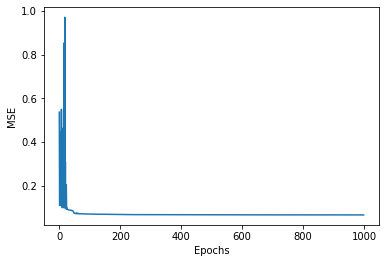

In [341]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


#### rprop with 75 neurons in hidden layer using tanh function

In [342]:
settings       = {
        "n_inputs" : 8,
        "layers"   : [  (75, tanh_function), (1, tanh_function) ]
    }
network        = NeuralNet( settings )
trainingset   = X_train
training_labels= y_train
testset       = X_test
test_labels    = y_test
cost_function  = sum_squared_error
epos,errs=resilient_backpropagation(network,training_set,training_labels,test_set,test_labels,cost_function)

(721, 8) (721,) (309, 8) (309,)
721 1
[training] Current error: 0.1099348849810147 	Epoch: 1
[training] Current error: 0.1099348849810147 	Epoch: 2
[training] Current error: 0.1099348849810147 	Epoch: 3
[training] Current error: 0.1099348849810147 	Epoch: 4
[training] Current error: 0.1099348849810147 	Epoch: 5
[training] Current error: 0.1099348849810147 	Epoch: 6
[training] Current error: 0.1099348849810147 	Epoch: 7
[training] Current error: 0.1099348849810147 	Epoch: 8


/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


[training] Current error: 0.1099348849810147 	Epoch: 9
[training] Current error: 0.1099348849810147 	Epoch: 10
[training] Current error: 0.1099348849810147 	Epoch: 11
[training] Current error: 0.1099348849810147 	Epoch: 12
[training] Current error: 0.1099348849810147 	Epoch: 13
[training] Current error: 0.1099348849810147 	Epoch: 14
[training] Current error: 0.1099348849810147 	Epoch: 15
[training] Current error: 0.1099348849810147 	Epoch: 16
[training] Current error: 0.1099348849810147 	Epoch: 17
[training] Current error: 0.1099348849810147 	Epoch: 18
[training] Current error: 0.1099348849810147 	Epoch: 19
[training] Current error: 0.1099348849810147 	Epoch: 20
[training] Current error: 0.1099348849810147 	Epoch: 21
[training] Current error: 0.1099348849810147 	Epoch: 22
[training] Current error: 0.1099348849810147 	Epoch: 23
[training] Current error: 0.1099348849810147 	Epoch: 24
[training] Current error: 0.1099348849810147 	Epoch: 25
[training] Current error: 0.1099348849810147 	Epo

[training] Current error: 0.1099348849810147 	Epoch: 164
[training] Current error: 0.1099348849810147 	Epoch: 165
[training] Current error: 0.1099348849810147 	Epoch: 166
[training] Current error: 0.1099348849810147 	Epoch: 167
[training] Current error: 0.1099348849810147 	Epoch: 168
[training] Current error: 0.1099348849810147 	Epoch: 169
[training] Current error: 0.1099348849810147 	Epoch: 170
[training] Current error: 0.1099348849810147 	Epoch: 171
[training] Current error: 0.1099348849810147 	Epoch: 172
[training] Current error: 0.1099348849810147 	Epoch: 173
[training] Current error: 0.1099348849810147 	Epoch: 174
[training] Current error: 0.1099348849810147 	Epoch: 175
[training] Current error: 0.1099348849810147 	Epoch: 176
[training] Current error: 0.1099348849810147 	Epoch: 177
[training] Current error: 0.1099348849810147 	Epoch: 178
[training] Current error: 0.1099348849810147 	Epoch: 179
[training] Current error: 0.1099348849810147 	Epoch: 180
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 314
[training] Current error: 0.1099348849810147 	Epoch: 315
[training] Current error: 0.1099348849810147 	Epoch: 316
[training] Current error: 0.1099348849810147 	Epoch: 317
[training] Current error: 0.1099348849810147 	Epoch: 318
[training] Current error: 0.1099348849810147 	Epoch: 319
[training] Current error: 0.1099348849810147 	Epoch: 320
[training] Current error: 0.1099348849810147 	Epoch: 321
[training] Current error: 0.1099348849810147 	Epoch: 322
[training] Current error: 0.1099348849810147 	Epoch: 323
[training] Current error: 0.1099348849810147 	Epoch: 324
[training] Current error: 0.1099348849810147 	Epoch: 325
[training] Current error: 0.1099348849810147 	Epoch: 326
[training] Current error: 0.1099348849810147 	Epoch: 327
[training] Current error: 0.1099348849810147 	Epoch: 328
[training] Current error: 0.1099348849810147 	Epoch: 329
[training] Current error: 0.1099348849810147 	Epoch: 330
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 461
[training] Current error: 0.1099348849810147 	Epoch: 462
[training] Current error: 0.1099348849810147 	Epoch: 463
[training] Current error: 0.1099348849810147 	Epoch: 464
[training] Current error: 0.1099348849810147 	Epoch: 465
[training] Current error: 0.1099348849810147 	Epoch: 466
[training] Current error: 0.1099348849810147 	Epoch: 467
[training] Current error: 0.1099348849810147 	Epoch: 468
[training] Current error: 0.1099348849810147 	Epoch: 469
[training] Current error: 0.1099348849810147 	Epoch: 470
[training] Current error: 0.1099348849810147 	Epoch: 471
[training] Current error: 0.1099348849810147 	Epoch: 472
[training] Current error: 0.1099348849810147 	Epoch: 473
[training] Current error: 0.1099348849810147 	Epoch: 474
[training] Current error: 0.1099348849810147 	Epoch: 475
[training] Current error: 0.1099348849810147 	Epoch: 476
[training] Current error: 0.1099348849810147 	Epoch: 477
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 610
[training] Current error: 0.1099348849810147 	Epoch: 611
[training] Current error: 0.1099348849810147 	Epoch: 612
[training] Current error: 0.1099348849810147 	Epoch: 613
[training] Current error: 0.1099348849810147 	Epoch: 614
[training] Current error: 0.1099348849810147 	Epoch: 615
[training] Current error: 0.1099348849810147 	Epoch: 616
[training] Current error: 0.1099348849810147 	Epoch: 617
[training] Current error: 0.1099348849810147 	Epoch: 618
[training] Current error: 0.1099348849810147 	Epoch: 619
[training] Current error: 0.1099348849810147 	Epoch: 620
[training] Current error: 0.1099348849810147 	Epoch: 621
[training] Current error: 0.1099348849810147 	Epoch: 622
[training] Current error: 0.1099348849810147 	Epoch: 623
[training] Current error: 0.1099348849810147 	Epoch: 624
[training] Current error: 0.1099348849810147 	Epoch: 625
[training] Current error: 0.1099348849810147 	Epoch: 626
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 759
[training] Current error: 0.1099348849810147 	Epoch: 760
[training] Current error: 0.1099348849810147 	Epoch: 761
[training] Current error: 0.1099348849810147 	Epoch: 762
[training] Current error: 0.1099348849810147 	Epoch: 763
[training] Current error: 0.1099348849810147 	Epoch: 764
[training] Current error: 0.1099348849810147 	Epoch: 765
[training] Current error: 0.1099348849810147 	Epoch: 766
[training] Current error: 0.1099348849810147 	Epoch: 767
[training] Current error: 0.1099348849810147 	Epoch: 768
[training] Current error: 0.1099348849810147 	Epoch: 769
[training] Current error: 0.1099348849810147 	Epoch: 770
[training] Current error: 0.1099348849810147 	Epoch: 771
[training] Current error: 0.1099348849810147 	Epoch: 772
[training] Current error: 0.1099348849810147 	Epoch: 773
[training] Current error: 0.1099348849810147 	Epoch: 774
[training] Current error: 0.1099348849810147 	Epoch: 775
[training] Current error: 0.109

[training] Current error: 0.1099348849810147 	Epoch: 904
[training] Current error: 0.1099348849810147 	Epoch: 905
[training] Current error: 0.1099348849810147 	Epoch: 906
[training] Current error: 0.1099348849810147 	Epoch: 907
[training] Current error: 0.1099348849810147 	Epoch: 908
[training] Current error: 0.1099348849810147 	Epoch: 909
[training] Current error: 0.1099348849810147 	Epoch: 910
[training] Current error: 0.1099348849810147 	Epoch: 911
[training] Current error: 0.1099348849810147 	Epoch: 912
[training] Current error: 0.1099348849810147 	Epoch: 913
[training] Current error: 0.1099348849810147 	Epoch: 914
[training] Current error: 0.1099348849810147 	Epoch: 915
[training] Current error: 0.1099348849810147 	Epoch: 916
[training] Current error: 0.1099348849810147 	Epoch: 917
[training] Current error: 0.1099348849810147 	Epoch: 918
[training] Current error: 0.1099348849810147 	Epoch: 919
[training] Current error: 0.1099348849810147 	Epoch: 920
[training] Current error: 0.109

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


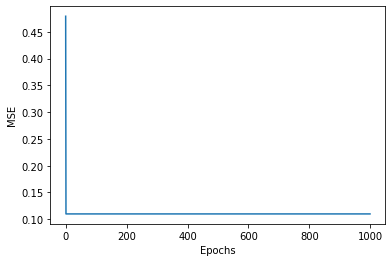

In [343]:
plt.figure(1)
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.plot(errs)
plt.show()


### Neural Net using QuickProp

#### Using 25 units in single hidden layer

#### Using 50 units in single hidden layer

#### Using 75 units in single hidden layer

## Problem 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def sum_squared_error( outputs, targets):
    summ=(np.sum( np.power(outputs - targets,2), axis = 1 ))
    return 0.5 * np.mean((np.sum( np.power(outputs - targets,2), axis = 0 )))

In [11]:
def costfunction(X,y,theta):

    m = np.size(y)    
    #Cost function in vectorized form
    h = np.dot(X , theta)
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;

In [12]:
from scipy.stats import truncnorm

def get_truncated_normal(mean, sd, low, upp):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [13]:
X = get_truncated_normal(mean=0, sd=0.1, low=-4, upp=4)
x=X.rvs([400,2])

#### Using given linear equation $ y= 2x_1 + 3x_2 + \epsilon $ 

In [14]:
y=np.zeros(400).reshape((400,1))
for i in range(400):
    y[i]=2*x[i][0]+3*x[i][1]

#### We use squared error as loss function 
### $ J = \frac{1}{2n} \sum_{i=0}^{n}  (y_{i}- mx_{i})^2 $   

where y is output  and $ m_1 $ and $ m_2  $ are two parameters.

#### To find  $ \eta_{opt} $ we find eigen value s $ \lambda $ of Hessian of input matrix and choose $ \lambda_{max}  $

 $ \nabla^{2}f(w)= X^{T}X $
 
 Ref: https://www.cs.ubc.ca/~schmidtm/Courses/Notes/linearQuadraticGradients.pdf

In [15]:
from numpy import linalg as LA
Mat= np.dot(x.transpose(),x)
w, v = LA.eig(Mat)
w

array([3.53997469, 4.24530873])

#### We choose $ \eta_{opt} = 1/4.4090 $

In [16]:
def linear_regression(X, y,learning_rate=0.01):
    epochs=1000
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)  
    N = float(len(y))
    err=np.zeros(epochs)
    ep=np.zeros(epochs)
    m_current=np.zeros(2).reshape((2,1))
    for i in range(epochs):
        
        iter_x = np.append(iter_x,m_current[0])
        iter_y = np.append(iter_y,m_current[1])
        iter_count = np.append(iter_count ,i)  

        
        y_current = np.dot(X,m_current)
        #print('pred shape',y_current.shape)
        cost = sum([data**2 for data in (y-y_current)]) / N
        print('MSE:',cost[0])
        err[i]=cost[0]
        ep[i]=i
        m_gradient = (1/N)*(np.dot(X.transpose(),(np.dot(X,m_current)))- np.dot(X.transpose(),y))
        m_current = m_current - (learning_rate * m_gradient)
    return m_current, cost,ep,err,iter_x,iter_y,iter_count

In [17]:
alpha_opt=1/4.4090
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha_opt)

MSE: 0.13785334961887766
MSE: 0.137190949218445
MSE: 0.1365317321036515
MSE: 0.13587568297511685
MSE: 0.13522278660699732
MSE: 0.13457302784663347
MSE: 0.1339263916141977
MSE: 0.13328286290234467
MSE: 0.13264242677586263
MSE: 0.13200506837132647
MSE: 0.13137077289675317
MSE: 0.1307395256312575
MSE: 0.13011131192471173
MSE: 0.12948611719740433
MSE: 0.128863926939701
MSE: 0.12824472671170983
MSE: 0.127628502142944
MSE: 0.1270152389319892
MSE: 0.12640492284617155
MSE: 0.12579753972122698
MSE: 0.12519307546097228
MSE: 0.12459151603697784
MSE: 0.12399284748824259
MSE: 0.12339705592086916
MSE: 0.12280412750774147
MSE: 0.12221404848820416
MSE: 0.12162680516774232
MSE: 0.12104238391766456
MSE: 0.12046077117478574
MSE: 0.11988195344111213
MSE: 0.1193059172835291
MSE: 0.11873264933348804
MSE: 0.11816213628669629
MSE: 0.11759436490280903
MSE: 0.11702932200512038
MSE: 0.11646699448025957
MSE: 0.11590736927788434
MSE: 0.11535043341037955
MSE: 0.11479617395255477
MSE: 0.11424457804134493
MSE: 0.1136

MSE: 0.01616862660687855
MSE: 0.016090958443990756
MSE: 0.016013663433856823
MSE: 0.01593673978342905
MSE: 0.01586018570827644
MSE: 0.01578399943254356
MSE: 0.01570817918890915
MSE: 0.015632723218545166
MSE: 0.015557629771075936
MSE: 0.015482897104537546
MSE: 0.015408523485337442
MSE: 0.015334507188214093
MSE: 0.015260846496197158
MSE: 0.015187539700567371
MSE: 0.01511458510081708
MSE: 0.015041981004610705
MSE: 0.014969725727745487
MSE: 0.014897817594112408
MSE: 0.0148262549356572
MSE: 0.014755036092341823
MSE: 0.014684159412105683
MSE: 0.014613623250827556
MSE: 0.01454342597228722
MSE: 0.01447356594812758
MSE: 0.014404041557816898
MSE: 0.0143348511886111
MSE: 0.0142659932355164
MSE: 0.014197466101252087
MSE: 0.014129268196213372
MSE: 0.014061397938434552
MSE: 0.01399385375355227
MSE: 0.013926634074769009
MSE: 0.013859737342816685
MSE: 0.013793162005920498
MSE: 0.013726906519762928
MSE: 0.013660969347447802
MSE: 0.013595348959464742
MSE: 0.013530043833653638
MSE: 0.013465052455169282
M

MSE: 0.003191824108808684
MSE: 0.0031764966038543806
MSE: 0.0031612427196522686
MSE: 0.0031460621025231504
MSE: 0.0031309544004872003
MSE: 0.0031159192632557817
MSE: 0.003100956342223333
MSE: 0.0030860652904592723
MSE: 0.0030712457626999473
MSE: 0.0030564974153406382
MSE: 0.0030418199064275505
MSE: 0.0030272128956499457
MSE: 0.0030126760443321674
MSE: 0.002998209015425851
MSE: 0.0029838114735020577
MSE: 0.002969483084743523
MSE: 0.0029552235169368977
MSE: 0.002941032439465038
MSE: 0.0029269095232993423
MSE: 0.002912854440992119
MSE: 0.002898866866668975
MSE: 0.002884946476021276
MSE: 0.0028710929462986146
MSE: 0.0028573059563013104
MSE: 0.002843585186372972
MSE: 0.002829930318393082
MSE: 0.0028163410357696017
MSE: 0.002802817023431642
MSE: 0.0027893579678221524
MSE: 0.0027759635568906345
MSE: 0.0027626334800859072
MSE: 0.002749367428348908
MSE: 0.002736165094105528
MSE: 0.002723026171259451
MSE: 0.0027099503551850806
MSE: 0.0026969373427204553
MSE: 0.0026839868321602203
MSE: 0.00267109

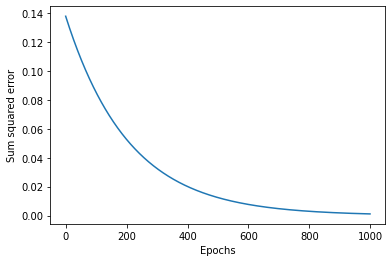

In [18]:
import matplotlib.pyplot as plt
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### Contour plots for $ \eta_{opt} $

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


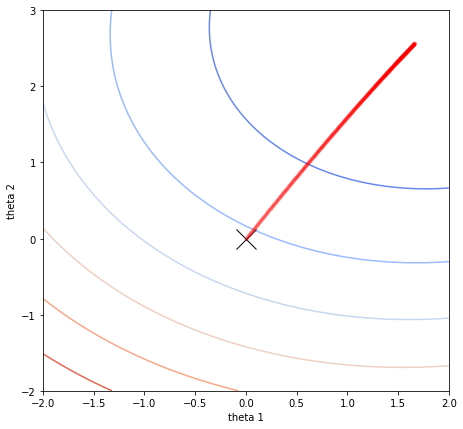

In [273]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,3,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 1)
ax.plot(0,0, marker = 'x', color = 'black', markersize = 20)
ax.plot(iter_x,iter_y, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = \frac{0.9* \eta_{opt}}{2}  $

In [22]:
alpha= 0.45*(1/4.4090)
weights,cost,ep,err,iter_x1,iter_y1,iter_count1=linear_regression(x,y,alpha)

MSE: 0.13785334961887766
MSE: 0.13755507199813255
MSE: 0.13725743984705066
MSE: 0.13696045176870242
MSE: 0.13666410636918339
MSE: 0.13636840225760455
MSE: 0.13607333804608865
MSE: 0.13577891234976092
MSE: 0.1354851237867452
MSE: 0.1351919709781556
MSE: 0.13489945254809102
MSE: 0.1346075671236282
MSE: 0.134316313334815
MSE: 0.13402568981466506
MSE: 0.1337356951991504
MSE: 0.1334463281271951
MSE: 0.13315758724066953
MSE: 0.13286947118438333
MSE: 0.13258197860607931
MSE: 0.13229510815642692
MSE: 0.13200885848901672
MSE: 0.13172322826035235
MSE: 0.13143821612984652
MSE: 0.1311538207598124
MSE: 0.13087004081545894
MSE: 0.13058687496488403
MSE: 0.13030432187906826
MSE: 0.130022380231869
MSE: 0.1297410487000131
MSE: 0.12946032596309248
MSE: 0.12918021070355645
MSE: 0.12890070160670544
MSE: 0.12862179736068652
MSE: 0.1283434966564851
MSE: 0.1280657981879206
MSE: 0.1277887006516386
MSE: 0.1275122027471067
MSE: 0.12723630317660642
MSE: 0.12696100064522844
MSE: 0.12668629386086588
MSE: 0.12641218

MSE: 0.057214774025121366
MSE: 0.05709099061426281
MSE: 0.05696747504413168
MSE: 0.056844226735111365
MSE: 0.05672124510883959
MSE: 0.056598529588206
MSE: 0.05647607959734915
MSE: 0.05635389456165386
MSE: 0.056231973907748464
MSE: 0.056110317063502634
MSE: 0.05598892345802359
MSE: 0.055867792521654816
MSE: 0.055746923685972165
MSE: 0.05562631638378192
MSE: 0.055505970049117816
MSE: 0.055385884117238465
MSE: 0.05526605802462493
MSE: 0.05514649120897742
MSE: 0.05502718310921372
MSE: 0.054908133165465285
MSE: 0.054789340819075674
MSE: 0.05467080551259738
MSE: 0.05455252668978929
MSE: 0.054434503795614333
MSE: 0.05431673627623634
MSE: 0.05419922357901808
MSE: 0.05408196515251812
MSE: 0.05396496044648875
MSE: 0.053848208911872864
MSE: 0.05373171000080177
MSE: 0.05361546316659241
MSE: 0.053499467863745015
MSE: 0.053383723547940305
MSE: 0.05326822967603695
MSE: 0.05315298570606938
MSE: 0.05303799109724463
MSE: 0.05292324530994047
MSE: 0.05280874780570219
MSE: 0.0526944980472406
MSE: 0.0525804

MSE: 0.02240023404663515
MSE: 0.02235177822106738
MSE: 0.022303427231239795
MSE: 0.022255180850306443
MSE: 0.02220703885191217
MSE: 0.022159001010191717
MSE: 0.022111067099768643
MSE: 0.022063236895754196
MSE: 0.02201551017374632
MSE: 0.02196788670982859
MSE: 0.021920366280569106
MSE: 0.021872948663019507
MSE: 0.021825633634713973
MSE: 0.02177842097366801
MSE: 0.021731310458377548
MSE: 0.0216843018678179
MSE: 0.021637394981442667
MSE: 0.021590589579182716
MSE: 0.021543885441445153
MSE: 0.02149728234911233
MSE: 0.021450780083540778
MSE: 0.021404378426560112
MSE: 0.02135807716047214
MSE: 0.021311876068049834
MSE: 0.021265774932536195
MSE: 0.02121977353764325
MSE: 0.021173871667551178
MSE: 0.021128069106907184
MSE: 0.021082365640824458
MSE: 0.021036761054881246
MSE: 0.02099125513511987
MSE: 0.020945847668045567
MSE: 0.020900538440625654
MSE: 0.020855327240288428
MSE: 0.020810213854922273
MSE: 0.02076519807287449
MSE: 0.020720279682950444
MSE: 0.020675458474412628
MSE: 0.020630734236979444

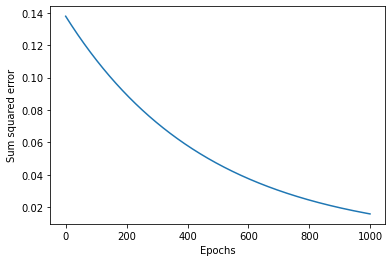

In [23]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### contour plot for $ \eta = \frac{0.9* \eta_{opt}}{2} $ 

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


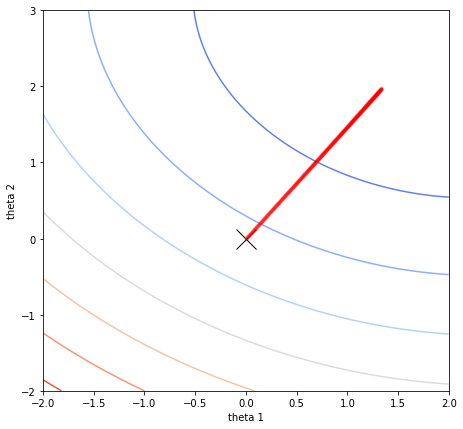

In [25]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,3,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(0,0, marker = 'x', color = 'black', markersize = 20)



ax.plot(iter_x1,iter_y1, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = \frac{1.5* \eta_{opt}}{2}  $

In [26]:
alpha= 0.75*(1/4.4090)
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha)

MSE: 0.13785334961887766
MSE: 0.1373563997423785
MSE: 0.13686124154254492
MSE: 0.13636786855911764
MSE: 0.1358762743551335
MSE: 0.13538645251684098
MSE: 0.13489839665361653
MSE: 0.13441210039788096
MSE: 0.13392755740501713
MSE: 0.1334447613532863
MSE: 0.13296370594374599
MSE: 0.13248438490016748
MSE: 0.13200679196895412
MSE: 0.1315309209190603
MSE: 0.13105676554190893
MSE: 0.130584319651311
MSE: 0.13011357708338536
MSE: 0.1296445316964774
MSE: 0.1291771773710792
MSE: 0.1287115080097501
MSE: 0.1282475175370364
MSE: 0.12778519989939277
MSE: 0.12732454906510252
MSE: 0.12686555902419946
MSE: 0.12640822378838942
MSE: 0.12595253739097148
MSE: 0.125498493886761
MSE: 0.12504608735201153
MSE: 0.12459531188433726
MSE: 0.12414616160263668
MSE: 0.123698630647015
MSE: 0.12325271317870838
MSE: 0.12280840338000747
MSE: 0.1223656954541812
MSE: 0.1219245836254017
MSE: 0.12148506213866832
MSE: 0.12104712525973312
MSE: 0.12061076727502563
MSE: 0.12017598249157785
MSE: 0.1197427652369512
MSE: 0.1193111098

MSE: 0.029925385648613377
MSE: 0.029817529500148834
MSE: 0.02971006214312263
MSE: 0.029602982175870034
MSE: 0.029496288201780217
MSE: 0.029389978829277782
MSE: 0.029284052671804863
MSE: 0.0291785083478029
MSE: 0.02907334448069462
MSE: 0.028968559698865998
MSE: 0.028864152635648635
MSE: 0.028760121929301618
MSE: 0.028656466222993858
MSE: 0.028553184164786426
MSE: 0.028450274407614974
MSE: 0.02834773560927197
MSE: 0.02824556643238929
MSE: 0.028143765544420808
MSE: 0.028042331617624906
MSE: 0.02794126332904729
MSE: 0.02784055936050358
MSE: 0.02774021839856219
MSE: 0.027640239134527247
MSE: 0.027540620264421282
MSE: 0.02744136048896853
MSE: 0.027342458513577753
MSE: 0.027243913048325404
MSE: 0.02714572280793891
MSE: 0.02704788651177969
MSE: 0.02695040288382662
MSE: 0.02685327065265925
MSE: 0.02675648855144142
MSE: 0.026660055317904448
MSE: 0.026563969694330863
MSE: 0.026468230427537938
MSE: 0.026372836268861402
MSE: 0.026277785974138976
MSE: 0.026183078303694342
MSE: 0.02608871202232074
MS

MSE: 0.009357507181849212
MSE: 0.009323787784377804
MSE: 0.009290189915966246
MSE: 0.009256713138540115
MSE: 0.009223357015604332
MSE: 0.009190121112237416
MSE: 0.009157004995085863
MSE: 0.009124008232358488
MSE: 0.009091130393820743
MSE: 0.009058371050789181
MSE: 0.009025729776125795
MSE: 0.008993206144232452
MSE: 0.00896079973104544
MSE: 0.00892851011402977
MSE: 0.00889633687217379
MSE: 0.008864279585983669
MSE: 0.008832337837477881
MSE: 0.00880051121018178
MSE: 0.008768799289122225
MSE: 0.00873720166082202
MSE: 0.00870571791329468
MSE: 0.008674347636038943
MSE: 0.00864309042003348
MSE: 0.008611945857731534
MSE: 0.008580913543055619
MSE: 0.008549993071392164
MSE: 0.008519184039586337
MSE: 0.008488486045936673
MSE: 0.008457898690189954
MSE: 0.00842742157353587
MSE: 0.008397054298601903
MSE: 0.008366796469448054
MSE: 0.00833664769156183
MSE: 0.00830660757185292
MSE: 0.008276675718648164
MSE: 0.008246851741686436
MSE: 0.008217135252113556
MSE: 0.00818752586247722
MSE: 0.0081580231867218

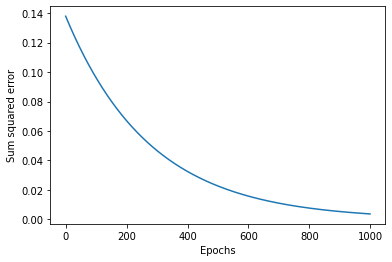

In [27]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### contour plot for $ \eta = \frac{1.5* \eta_{opt}}{2} $ 

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


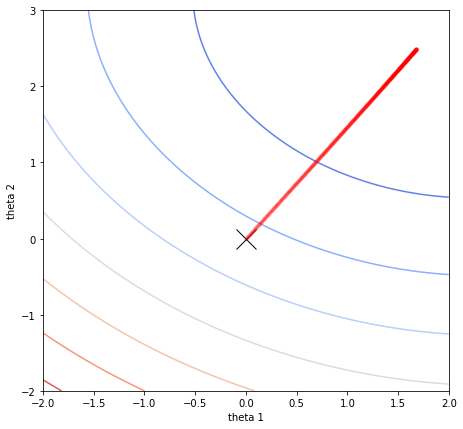

In [28]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,3,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 1)
ax.plot(0,0, marker = 'x', color = 'black', markersize = 20)
ax.plot(iter_x,iter_y, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

#### Gradient descent with 
### $ \eta = 1.5* \eta_{opt}  $

In [30]:
alpha= 1.5*(1/4.4090)
weights,cost,ep,err,iter_x,iter_y,iter_count=linear_regression(x,y,alpha)

MSE: 0.13785334961887766
MSE: 0.13686034732292615
MSE: 0.13587449879561495
MSE: 0.13489575249477237
MSE: 0.13392405724961398
MSE: 0.1329593622580661
MSE: 0.13200161708410835
MSE: 0.13105077165513718
MSE: 0.1301067762593448
MSE: 0.12916958154312275
MSE: 0.12823913850847687
MSE: 0.1273153985104677
MSE: 0.1263983132546649
MSE: 0.12548783479462178
MSE: 0.12458391552936815
MSE: 0.12368650820092014
MSE: 0.1227955658918092
MSE: 0.12191104202262831
MSE: 0.1210328903495955
MSE: 0.12016106496213597
MSE: 0.11929552028048057
MSE: 0.11843621105328174
MSE: 0.1175830923552479
MSE: 0.11673611958479352
MSE: 0.1158952484617055
MSE: 0.11506043502482875
MSE: 0.11423163562976678
MSE: 0.11340880694659852
MSE: 0.11259190595761273
MSE: 0.11178088995505807
MSE: 0.11097571653891032
MSE: 0.11017634361465291
MSE: 0.10938272939107833
MSE: 0.10859483237809966
MSE: 0.10781261138458337
MSE: 0.10703602551619222
MSE: 0.10626503417324931
MSE: 0.10549959704861324
MSE: 0.10473967412557014
MSE: 0.10398522567574198
MSE: 0.1

MSE: 0.005370666993565778
MSE: 0.005332000170743842
MSE: 0.005293611791410383
MSE: 0.0052554998501263914
MSE: 0.005217662355898715
MSE: 0.005180097332075996
MSE: 0.00514280281624534
MSE: 0.0051057768601297515
MSE: 0.005069017529486305
MSE: 0.0050325229040050065
MSE: 0.0049962910772084835
MSE: 0.004960320156352222
MSE: 0.004924608262325773
MSE: 0.00488915352955441
MSE: 0.004853954105901692
MSE: 0.004819008152572593
MSE: 0.0047843138440174585
MSE: 0.004749869367836516
MSE: 0.004715672924685188
MSE: 0.004681722728180019
MSE: 0.004648017004805289
MSE: 0.004614553993820364
MSE: 0.004581331947167604
MSE: 0.00454834912938103
MSE: 0.0045156038174955955
MSE: 0.00448309430095714
MSE: 0.0044508188815329695
MSE: 0.004418775873223102
MSE: 0.004386963602172129
MSE: 0.004355380406581747
MSE: 0.004324024636623855
MSE: 0.0042928946543543825
MSE: 0.0042619888336276205
MSE: 0.004231305560011261
MSE: 0.004200843230701982
MSE: 0.0041706002544417
MSE: 0.0041405750514343954
MSE: 0.004110766053263523
MSE: 0.0

MSE: 0.0005558189220722026
MSE: 0.0005518194737478187
MSE: 0.0005478488123299062
MSE: 0.0005439067305672352
MSE: 0.0005399930227009904
MSE: 0.0005361074844540202
MSE: 0.0005322499130201639
MSE: 0.0005284201070536592
MSE: 0.0005246178666586265
MSE: 0.0005208429933786198
MSE: 0.0005170952901862677
MSE: 0.0005133745614729775
MSE: 0.0005096806130387098
MSE: 0.0005060132520818486
MSE: 0.0005023722871891172
MSE: 0.0004987575283255833
MSE: 0.000495168786824735
MSE: 0.0004916058753786183
MSE: 0.0004880686080280617
MSE: 0.00048455680015295217
MSE: 0.00048107026846259975
MSE: 0.0004776088309861563
MSE: 0.000474172307063115
MSE: 0.00047076051733387173
MSE: 0.00046737328373035154
MSE: 0.0004640104294667119
MSE: 0.0004606717790301085
MSE: 0.00045735715817152403
MSE: 0.0004540663938966672
MSE: 0.00045079931445693466
MSE: 0.0004475557493404432
MSE: 0.00044433552926311784
MSE: 0.0004411384861598556
MSE: 0.00043796445317573885
MSE: 0.00043481326465732474
MSE: 0.0004316847561439935
MSE: 0.00042857876435

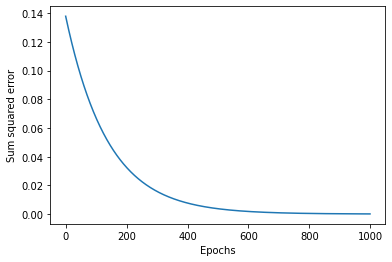

In [31]:
plt.figure(1)
plt.ylabel('Sum squared error')
plt.xlabel('Epochs')
plt.plot(err)
plt.show()

#### contour plot for $ \eta = 1.5 * \eta_{opt} $ 

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'label'


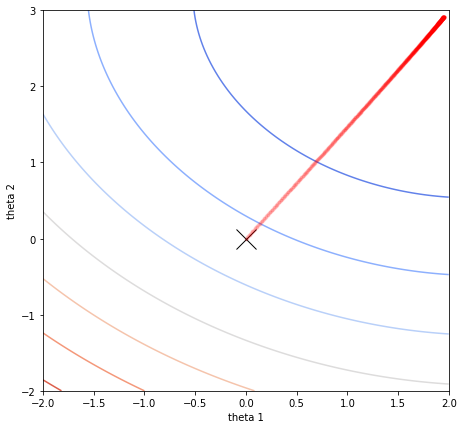

In [32]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,3,100))

zz_ls = np.array(  [costfunction(x, y,np.array([t0,t1]).reshape(-1,1)) for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values  

Z_ls = zz_ls.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)

ax.contour(xx, yy, Z_ls, cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')

ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 1)
ax.plot(0,0, marker = 'x', color = 'black', markersize = 20)

ax.plot(iter_x,iter_y, linestyle = 'none', marker = '.', color = 'red', alpha = .1)

plt.show()

## Problem 4

In [89]:
import numpy as np

mu1 = [-3,4]
mu2 = [4,-3]

sig1 = [[16, 0],[0, 9]]
sig2 = [[16, 0],[0, 9]]

train_set0 = np.append(np.random.multivariate_normal(mu1,sig1,200),np.ones((200,1)),axis=1)
train_set1 = np.append(np.random.multivariate_normal(mu2,sig2,200),-np.ones((200,1)),axis=1)
test_set0 = np.append(np.random.multivariate_normal(mu1,sig1,100),np.ones((100,1)),axis=1)
test_set1 = np.append(np.random.multivariate_normal(mu2,sig2,100),-np.ones((100,1)),axis=1)

In [90]:
## Train set concatenated

X_train=np.zeros((400,2))
y_train=np.zeros((400,1))
X_test=np.zeros((200,2))
y_test=np.zeros((200,1))
ind = 0
for i in range(0,200):
    X_train[ind]=np.array([train_set0[i][0],train_set0[i][1]])
    y_train[ind]=train_set0[i][2]
    ind+=1
for i in range(0,200):
    X_train[ind]=np.array([train_set1[i][0],train_set1[i][1]])
    y_train[ind]=train_set1[i][2]
    ind+=1

ind1=0
for i in range(0,100):
    X_test[ind1]=np.array([test_set0[i][0],test_set0[i][1]])
    y_test[ind1]=test_set0[i][2]
    ind1+=1
for i in range(0,100):
    X_test[ind1]=np.array([test_set1[i][0],test_set1[i][1]])
    y_test[ind1]=test_set1[i][2]
    ind1+=1

X_train = np.concatenate((X_train, np.ones((400,1))),axis = 1)
X_test = np.concatenate((X_test, np.ones((200,1))),axis = 1)

In [91]:
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T

In [92]:
from sklearn.metrics import accuracy_score
def sigmoid(x):
    a  = 1/(1+np.exp(-x))
    return a

In [93]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred

In [134]:
learning_rate = 0.000008
w = np.random.randn(1,3)
loss_steps=np.array([])
for i in range(1,1000):
    z = np.dot(w,X_train)
    y_pred = prediction(w, X_train)
    val = -np.multiply(y_train,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y_train,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(X_train,f.T)
    w = w - learning_rate*gradJ.T
    #print(y_pred,y_train[0])
    loss_steps=np.append(loss_steps,J)
    print("Epoch",i,"Loss",J,"Training Accuracy",accuracy_score(y_train[0], y_pred)*100)

Epoch 1 Loss 252.37551405834108 Training Accuracy 76.0
Epoch 2 Loss 250.60154875429942 Training Accuracy 76.0
Epoch 3 Loss 248.8516810613735 Training Accuracy 76.25
Epoch 4 Loss 247.12550913010728 Training Accuracy 76.25
Epoch 5 Loss 245.42263925960617 Training Accuracy 76.5
Epoch 6 Loss 243.7426856598016 Training Accuracy 76.5
Epoch 7 Loss 242.08527022286938 Training Accuracy 76.5
Epoch 8 Loss 240.45002230397063 Training Accuracy 76.75
Epoch 9 Loss 238.83657851137824 Training Accuracy 77.0
Epoch 10 Loss 237.24458250595808 Training Accuracy 77.5
Epoch 11 Loss 235.6736848098896 Training Accuracy 77.5
Epoch 12 Loss 234.12354262443628 Training Accuracy 77.5
Epoch 13 Loss 232.59381965651107 Training Accuracy 77.5
Epoch 14 Loss 231.08418595373067 Training Accuracy 77.5
Epoch 15 Loss 229.59431774760452 Training Accuracy 77.75
Epoch 16 Loss 228.12389730447305 Training Accuracy 77.75
Epoch 17 Loss 226.6726127837817 Training Accuracy 77.75
Epoch 18 Loss 225.24015810326026 Training Accuracy 77.7

Epoch 216 Loss 113.54583839850378 Training Accuracy 88.75
Epoch 217 Loss 113.36581340953322 Training Accuracy 88.75
Epoch 218 Loss 113.18731491239626 Training Accuracy 88.75
Epoch 219 Loss 113.01032655221064 Training Accuracy 88.75
Epoch 220 Loss 112.83483217203258 Training Accuracy 88.75
Epoch 221 Loss 112.66081581054344 Training Accuracy 88.75
Epoch 222 Loss 112.48826169975594 Training Accuracy 88.75
Epoch 223 Loss 112.31715426273952 Training Accuracy 88.75
Epoch 224 Loss 112.14747811136493 Training Accuracy 88.75
Epoch 225 Loss 111.97921804406832 Training Accuracy 88.75
Epoch 226 Loss 111.81235904363405 Training Accuracy 88.75
Epoch 227 Loss 111.64688627499731 Training Accuracy 88.75
Epoch 228 Loss 111.4827850830653 Training Accuracy 88.75
Epoch 229 Loss 111.32004099055796 Training Accuracy 88.75
Epoch 230 Loss 111.15863969586768 Training Accuracy 88.75
Epoch 231 Loss 110.99856707093822 Training Accuracy 88.75
Epoch 232 Loss 110.8398091591626 Training Accuracy 88.75
Epoch 233 Loss 1

Epoch 417 Loss 94.82001662527522 Training Accuracy 89.5
Epoch 418 Loss 94.77516977061885 Training Accuracy 89.5
Epoch 419 Loss 94.7305764968132 Training Accuracy 89.5
Epoch 420 Loss 94.68623495870516 Training Accuracy 89.5
Epoch 421 Loss 94.64214332757074 Training Accuracy 89.5
Epoch 422 Loss 94.59829979093806 Training Accuracy 89.5
Epoch 423 Loss 94.55470255241215 Training Accuracy 89.5
Epoch 424 Loss 94.51134983150254 Training Accuracy 89.75
Epoch 425 Loss 94.46823986345241 Training Accuracy 89.75
Epoch 426 Loss 94.4253708990704 Training Accuracy 89.75
Epoch 427 Loss 94.38274120456414 Training Accuracy 89.75
Epoch 428 Loss 94.34034906137626 Training Accuracy 89.75
Epoch 429 Loss 94.29819276602205 Training Accuracy 89.75
Epoch 430 Loss 94.25627062992943 Training Accuracy 89.75
Epoch 431 Loss 94.21458097928084 Training Accuracy 90.0
Epoch 432 Loss 94.173122154857 Training Accuracy 90.0
Epoch 433 Loss 94.1318925118828 Training Accuracy 90.0
Epoch 434 Loss 94.09089041987498 Training Accu

Epoch 660 Loss 88.5518287409462 Training Accuracy 90.0
Epoch 661 Loss 88.53764546271789 Training Accuracy 90.0
Epoch 662 Loss 88.52351748384116 Training Accuracy 90.0
Epoch 663 Loss 88.50944449885199 Training Accuracy 90.0
Epoch 664 Loss 88.4954262041966 Training Accuracy 90.0
Epoch 665 Loss 88.4814622982176 Training Accuracy 90.0
Epoch 666 Loss 88.46755248114013 Training Accuracy 90.0
Epoch 667 Loss 88.45369645505838 Training Accuracy 90.0
Epoch 668 Loss 88.43989392392194 Training Accuracy 90.0
Epoch 669 Loss 88.42614459352251 Training Accuracy 90.0
Epoch 670 Loss 88.41244817148038 Training Accuracy 90.0
Epoch 671 Loss 88.39880436723152 Training Accuracy 90.0
Epoch 672 Loss 88.38521289201435 Training Accuracy 90.0
Epoch 673 Loss 88.37167345885676 Training Accuracy 90.0
Epoch 674 Loss 88.35818578256337 Training Accuracy 90.0
Epoch 675 Loss 88.34474957970266 Training Accuracy 90.0
Epoch 676 Loss 88.33136456859452 Training Accuracy 90.0
Epoch 677 Loss 88.31803046929747 Training Accuracy 

Epoch 898 Loss 86.24361470207262 Training Accuracy 90.25
Epoch 899 Loss 86.2369289601531 Training Accuracy 90.25
Epoch 900 Loss 86.23025941082565 Training Accuracy 90.25
Epoch 901 Loss 86.22360597581454 Training Accuracy 90.25
Epoch 902 Loss 86.21696857726018 Training Accuracy 90.25
Epoch 903 Loss 86.21034713771678 Training Accuracy 90.25
Epoch 904 Loss 86.20374158014994 Training Accuracy 90.25
Epoch 905 Loss 86.19715182793428 Training Accuracy 90.25
Epoch 906 Loss 86.19057780485122 Training Accuracy 90.25
Epoch 907 Loss 86.18401943508647 Training Accuracy 90.25
Epoch 908 Loss 86.1774766432279 Training Accuracy 90.25
Epoch 909 Loss 86.17094935426317 Training Accuracy 90.25
Epoch 910 Loss 86.16443749357735 Training Accuracy 90.25
Epoch 911 Loss 86.15794098695092 Training Accuracy 90.25
Epoch 912 Loss 86.15145976055723 Training Accuracy 90.25
Epoch 913 Loss 86.14499374096049 Training Accuracy 90.25
Epoch 914 Loss 86.1385428551134 Training Accuracy 90.25
Epoch 915 Loss 86.132107030355 Tra

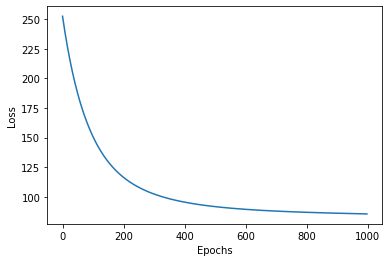

In [135]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(loss_steps)
plt.show()

In [136]:
y_test_pred=prediction(w,X_test)
print(accuracy_score(y_test[0],y_test_pred)*100)

90.0


#### Now we preprocess the data

In [137]:
X_train_norm= (X_train-X_train.mean())/ np.std(X_train)
X_test_norm= (X_test-X_test.mean())/ np.std(X_test)

In [138]:
X_train_norm

array([[-0.65187627, -0.21168467, -2.12594724, ...,  0.46221145,
         0.73371615,  1.53340815],
       [ 0.17851414,  1.43312643,  1.8842129 , ..., -0.54901399,
         0.78384049, -0.5142729 ],
       [ 0.10389725,  0.10389725,  0.10389725, ...,  0.10389725,
         0.10389725,  0.10389725]])

In [139]:
learning_rate = 0.00009
w1 = np.random.randn(1,3)
loss_steps1=np.array([])
for i in range(1,1000):
    z1 = np.dot(w1,X_train_norm)
    y_pred = prediction(w1, X_train_norm)
    val = -np.multiply(y_train,z1)
    J1 = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y_train,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ1 = np.dot(X_train_norm,f.T)
    w1 = w1 - learning_rate*gradJ1.T
    #print(y_pred,y_train[0])
    loss_steps1=np.append(loss_steps1,J1)
    print("Epoch",i,"Loss",J1,"Training Accuracy",accuracy_score(y_train[0], y_pred)*100)

Epoch 1 Loss 180.67316066766756 Training Accuracy 77.5
Epoch 2 Loss 179.59233750573165 Training Accuracy 77.5
Epoch 3 Loss 178.52899181790193 Training Accuracy 77.5
Epoch 4 Loss 177.48276015564963 Training Accuracy 77.75
Epoch 5 Loss 176.45328755057074 Training Accuracy 78.25
Epoch 6 Loss 175.4402272998397 Training Accuracy 78.5
Epoch 7 Loss 174.4432407582193 Training Accuracy 78.75
Epoch 8 Loss 173.46199713636224 Training Accuracy 78.75
Epoch 9 Loss 172.49617330515073 Training Accuracy 78.75
Epoch 10 Loss 171.5454536058288 Training Accuracy 79.0
Epoch 11 Loss 170.60952966569292 Training Accuracy 79.75
Epoch 12 Loss 169.68810021911565 Training Accuracy 80.0
Epoch 13 Loss 168.78087093368657 Training Accuracy 80.25
Epoch 14 Loss 167.88755424126583 Training Accuracy 80.25
Epoch 15 Loss 167.00786917375336 Training Accuracy 80.75
Epoch 16 Loss 166.14154120338742 Training Accuracy 81.25
Epoch 17 Loss 165.28830208739487 Training Accuracy 81.5
Epoch 18 Loss 164.4478897168247 Training Accuracy 

Epoch 214 Loss 100.88971491855973 Training Accuracy 88.25
Epoch 215 Loss 100.76983303883497 Training Accuracy 88.75
Epoch 216 Loss 100.65075752385002 Training Accuracy 88.75
Epoch 217 Loss 100.53248083446331 Training Accuracy 88.75
Epoch 218 Loss 100.41499552358621 Training Accuracy 89.0
Epoch 219 Loss 100.29829423477479 Training Accuracy 89.0
Epoch 220 Loss 100.18236970084769 Training Accuracy 89.0
Epoch 221 Loss 100.06721474252929 Training Accuracy 89.0
Epoch 222 Loss 99.95282226711782 Training Accuracy 89.0
Epoch 223 Loss 99.83918526717784 Training Accuracy 89.0
Epoch 224 Loss 99.72629681925653 Training Accuracy 89.0
Epoch 225 Loss 99.61415008262327 Training Accuracy 89.0
Epoch 226 Loss 99.50273829803213 Training Accuracy 89.0
Epoch 227 Loss 99.39205478650663 Training Accuracy 89.0
Epoch 228 Loss 99.28209294814646 Training Accuracy 89.0
Epoch 229 Loss 99.1728462609556 Training Accuracy 89.0
Epoch 230 Loss 99.06430827969129 Training Accuracy 89.0
Epoch 231 Loss 98.95647263473386 Trai

Epoch 442 Loss 85.71908097457523 Training Accuracy 90.5
Epoch 443 Loss 85.68347692297223 Training Accuracy 90.5
Epoch 444 Loss 85.64802524812436 Training Accuracy 90.5
Epoch 445 Loss 85.61272506185354 Training Accuracy 90.5
Epoch 446 Loss 85.57757548254644 Training Accuracy 90.5
Epoch 447 Loss 85.54257563509563 Training Accuracy 90.5
Epoch 448 Loss 85.50772465084134 Training Accuracy 90.5
Epoch 449 Loss 85.47302166751382 Training Accuracy 90.5
Epoch 450 Loss 85.4384658291765 Training Accuracy 90.5
Epoch 451 Loss 85.4040562861693 Training Accuracy 90.5
Epoch 452 Loss 85.36979219505315 Training Accuracy 90.5
Epoch 453 Loss 85.33567271855458 Training Accuracy 90.5
Epoch 454 Loss 85.30169702551112 Training Accuracy 90.5
Epoch 455 Loss 85.26786429081723 Training Accuracy 90.5
Epoch 456 Loss 85.23417369537088 Training Accuracy 90.5
Epoch 457 Loss 85.20062442602051 Training Accuracy 90.5
Epoch 458 Loss 85.16721567551267 Training Accuracy 90.5
Epoch 459 Loss 85.1339466424402 Training Accuracy 

Epoch 679 Loss 80.18884226596089 Training Accuracy 90.75
Epoch 680 Loss 80.17386910394583 Training Accuracy 90.75
Epoch 681 Loss 80.15894289194199 Training Accuracy 90.75
Epoch 682 Loss 80.14406343103656 Training Accuracy 90.75
Epoch 683 Loss 80.12923052339093 Training Accuracy 90.75
Epoch 684 Loss 80.11444397223352 Training Accuracy 90.75
Epoch 685 Loss 80.09970358185286 Training Accuracy 90.75
Epoch 686 Loss 80.08500915759073 Training Accuracy 90.75
Epoch 687 Loss 80.0703605058352 Training Accuracy 90.75
Epoch 688 Loss 80.05575743401388 Training Accuracy 90.75
Epoch 689 Loss 80.0411997505872 Training Accuracy 90.75
Epoch 690 Loss 80.02668726504167 Training Accuracy 90.75
Epoch 691 Loss 80.0122197878832 Training Accuracy 90.75
Epoch 692 Loss 79.99779713063054 Training Accuracy 90.75
Epoch 693 Loss 79.98341910580876 Training Accuracy 90.75
Epoch 694 Loss 79.96908552694265 Training Accuracy 90.75
Epoch 695 Loss 79.95479620855033 Training Accuracy 90.75
Epoch 696 Loss 79.94055096613688 T

Epoch 891 Loss 77.82217967163663 Training Accuracy 91.25
Epoch 892 Loss 77.8139584306897 Training Accuracy 91.25
Epoch 893 Loss 77.80575820571582 Training Accuracy 91.25
Epoch 894 Loss 77.79757892548831 Training Accuracy 91.25
Epoch 895 Loss 77.78942051908892 Training Accuracy 91.25
Epoch 896 Loss 77.7812829159063 Training Accuracy 91.25
Epoch 897 Loss 77.77316604563438 Training Accuracy 91.25
Epoch 898 Loss 77.76506983827068 Training Accuracy 91.25
Epoch 899 Loss 77.7569942241148 Training Accuracy 91.25
Epoch 900 Loss 77.74893913376687 Training Accuracy 91.25
Epoch 901 Loss 77.74090449812579 Training Accuracy 91.25
Epoch 902 Loss 77.73289024838786 Training Accuracy 91.25
Epoch 903 Loss 77.72489631604512 Training Accuracy 91.25
Epoch 904 Loss 77.71692263288374 Training Accuracy 91.25
Epoch 905 Loss 77.70896913098268 Training Accuracy 91.25
Epoch 906 Loss 77.70103574271192 Training Accuracy 91.25
Epoch 907 Loss 77.69312240073117 Training Accuracy 91.25
Epoch 908 Loss 77.68522903798811 T

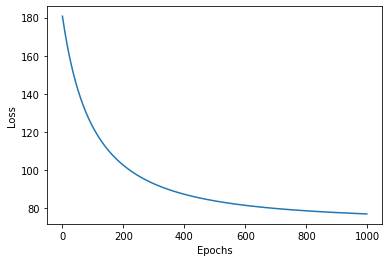

In [140]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(loss_steps1)
plt.show()